In [1]:
# !pip install git+https://github.com/alberanid/imdbpy
# !pip install pandas
# !pip install numpy
# !pip install matplotlib
# !pip install seaborn
# !pip install pandas_profiling --upgrade
# !pip install plotly
# !pip install wordcloud
# !pip install Flask

In [2]:
# Import Dataset
# Import File from Loacal Drive
# from google.colab import files
# data_to_load = files.upload()
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import collections
import plotly.express as px
import plotly.graph_objects as go
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.util import ngrams
from plotly.subplots import make_subplots
from plotly.offline import iplot, init_notebook_mode
from wordcloud import WordCloud, STOPWORDS
from pandas_profiling import ProfileReport
%matplotlib inline
warnings.filterwarnings("ignore")

In [4]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\pawan\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\pawan\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     C:\Users\pawan\AppData\Roaming\nltk_data...
[nltk_data]    |   Package biocreative_ppi is already up-to-date!
[nltk_data]    | Downloading package brown to
[nltk_data]    |     C:\Users\pawan\AppData\Roaming\nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package brown_tei to
[nltk_data]    |     C:\Users\pawan\AppData\Roaming\nltk_data...
[nltk_data]    |   Package brown_tei is already up-to-date!
[nltk_data]    | Downloading package cess_cat to
[nltk_data]    |     C:\Users\p

[nltk_data]    |   Package propbank is already up-to-date!
[nltk_data]    | Downloading package ptb to
[nltk_data]    |     C:\Users\pawan\AppData\Roaming\nltk_data...
[nltk_data]    |   Package ptb is already up-to-date!
[nltk_data]    | Downloading package product_reviews_1 to
[nltk_data]    |     C:\Users\pawan\AppData\Roaming\nltk_data...
[nltk_data]    |   Package product_reviews_1 is already up-to-date!
[nltk_data]    | Downloading package product_reviews_2 to
[nltk_data]    |     C:\Users\pawan\AppData\Roaming\nltk_data...
[nltk_data]    |   Package product_reviews_2 is already up-to-date!
[nltk_data]    | Downloading package pros_cons to
[nltk_data]    |     C:\Users\pawan\AppData\Roaming\nltk_data...
[nltk_data]    |   Package pros_cons is already up-to-date!
[nltk_data]    | Downloading package qc to
[nltk_data]    |     C:\Users\pawan\AppData\Roaming\nltk_data...
[nltk_data]    |   Package qc is already up-to-date!
[nltk_data]    | Downloading package reuters to
[nltk_data] 

[nltk_data]    |   Package snowball_data is already up-to-date!
[nltk_data]    | Downloading package bllip_wsj_no_aux to
[nltk_data]    |     C:\Users\pawan\AppData\Roaming\nltk_data...
[nltk_data]    |   Package bllip_wsj_no_aux is already up-to-date!
[nltk_data]    | Downloading package word2vec_sample to
[nltk_data]    |     C:\Users\pawan\AppData\Roaming\nltk_data...
[nltk_data]    |   Package word2vec_sample is already up-to-date!
[nltk_data]    | Downloading package panlex_swadesh to
[nltk_data]    |     C:\Users\pawan\AppData\Roaming\nltk_data...
[nltk_data]    |   Package panlex_swadesh is already up-to-date!
[nltk_data]    | Downloading package mte_teip5 to
[nltk_data]    |     C:\Users\pawan\AppData\Roaming\nltk_data...
[nltk_data]    |   Package mte_teip5 is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\pawan\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-

True

In [5]:
# path = '/content/drive/MyDrive/Files/'

path = 'C:\\Users\\pawan\\OneDrive\\Desktop\\ott\\Data\\'
 
df_movies = pd.read_csv(path + 'ottmovies.csv')
 
df_movies.head()

ID                           Title  Year  Age  IMDb Rotten Tomatoes  \
0   1                       Inception  2010  13+   8.8             87%   
1   2                      The Matrix  1999  16+   8.7             88%   
2   3          Avengers: Infinity War  2018  13+   8.4             85%   
3   4              Back to the Future  1985   7+   8.5             96%   
4   5  The Good, the Bad and the Ugly  1966  16+   8.8             97%   

                        Directors  \
0               Christopher Nolan   
1  Lana Wachowski,Lilly Wachowski   
2         Anthony Russo,Joe Russo   
3                 Robert Zemeckis   
4                    Sergio Leone   

                                                Cast  \
0  Leonardo DiCaprio,Joseph Gordon-Levitt,Elliot ...   
1  Keanu Reeves,Laurence Fishburne,Carrie-Anne Mo...   
2  Robert Downey Jr.,Chris Hemsworth,Mark Ruffalo...   
3  Michael J. Fox,Christopher Lloyd,Lea Thompson,...   
4  Eli Wallach,Clint Eastwood,Lee Van Cleef,Aldo ...   

                             Genres                                 Country  \
0  Action,Adventure,Sci-Fi,Thriller            United States,United Kingdom   
1                     Action,Sci-Fi                           United States   
2           Action,Adventure,Sci-Fi                           United States   
3           Adventure,Comedy,Sci-Fi                           United States   
4                           Western  Italy,Spain,West Germany,United States   

                  Language                                           Plotline  \
0  English,Japanese,French  Dom Cobb is a skilled thief, the absolute best...   
1                  English  Thomas A. Anderson is a man living two lives. ...   
2                  English  As the Avengers and their allies have continue...   
3                  English  Marty McFly, a typical American teenager of th...   
4                  Italian  Blondie (The Good) (Clint Eastwood) is a profe...   

   Runtime   Kind  Seasons  Netflix  Hulu  Prime Video  Disney+  Type  
0    148.0  movie      NaN        1     0            0        0     0  
1    136.0  movie      NaN        1     0            0        0     0  
2    149.0  movie      NaN        1     0            0        0     0  
3    116.0  movie      NaN        1     0            0        0     0  
4    161.0  movie      NaN        1     0            1        0     0

In [6]:
# profile = ProfileReport(df_movies)
# profile

In [7]:
def data_investigate(df):
    print('No of Rows : ', df.shape[0])
    print('No of Coloums : ', df.shape[1])
    print('**'*25)
    print('Colums Names : \n', df.columns)
    print('**'*25)
    print('Datatype of Columns : \n', df.dtypes)
    print('**'*25)
    print('Missing Values : ')
    c = df.isnull().sum()
    c = c[c > 0]
    print(c)
    print('**'*25)
    print('Missing vaules %age wise :\n')
    print((100*(df.isnull().sum()/len(df.index))))
    print('**'*25)
    print('Pictorial Representation : ')
    plt.figure(figsize = (10, 10))
    sns.heatmap(df.isnull(), yticklabels = False, cbar = False)
    plt.show()

No of Rows :  16923
No of Coloums :  20
**************************************************
Colums Names : 
 Index(['ID', 'Title', 'Year', 'Age', 'IMDb', 'Rotten Tomatoes', 'Directors',
       'Cast', 'Genres', 'Country', 'Language', 'Plotline', 'Runtime', 'Kind',
       'Seasons', 'Netflix', 'Hulu', 'Prime Video', 'Disney+', 'Type'],
      dtype='object')
**************************************************
Datatype of Columns : 
 ID                   int64
Title               object
Year                 int64
Age                 object
IMDb               float64
Rotten Tomatoes     object
Directors           object
Cast                object
Genres              object
Country             object
Language            object
Plotline            object
Runtime            float64
Kind                object
Seasons            float64
Netflix              int64
Hulu                 int64
Prime Video          int64
Disney+              int64
Type                 int64
dtype: object
*************

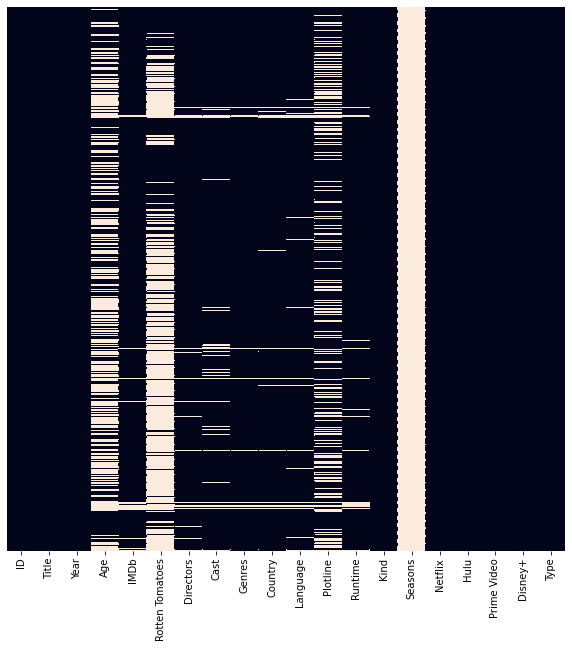

In [8]:
data_investigate(df_movies)

In [9]:
# ID
# df_movies = df_movies.drop(['ID'], axis = 1)
 
# Age
df_movies.loc[df_movies['Age'].isnull() & df_movies['Disney+'] == 1, "Age"] = '13'
# df_movies.fillna({'Age' : 18}, inplace = True)
df_movies.fillna({'Age' : 'NR'}, inplace = True)
df_movies['Age'].replace({'all': '0'}, inplace = True)
df_movies['Age'].replace({'7+': '7'}, inplace = True)
df_movies['Age'].replace({'13+': '13'}, inplace = True)
df_movies['Age'].replace({'16+': '16'}, inplace = True)
df_movies['Age'].replace({'18+': '18'}, inplace = True)
# df_movies['Age'] = df_movies['Age'].astype(int)
 
# IMDb
# df_movies.fillna({'IMDb' : df_movies['IMDb'].mean()}, inplace = True)
# df_movies.fillna({'IMDb' : df_movies['IMDb'].median()}, inplace = True)
df_movies.fillna({'IMDb' : "NA"}, inplace = True)
 
# Rotten Tomatoes
df_movies['Rotten Tomatoes'] = df_movies['Rotten Tomatoes'][df_movies['Rotten Tomatoes'].notnull()].str.replace('%', '').astype(int)
# df_movies['Rotten Tomatoes'] = df_movies['Rotten Tomatoes'][df_movies['Rotten Tomatoes'].notnull()].astype(int)
# df_movies.fillna({'Rotten Tomatoes' : df_movies['Rotten Tomatoes'].mean()}, inplace = True)
# df_movies.fillna({'Rotten Tomatoes' : df_movies['Rotten Tomatoes'].median()}, inplace = True)
# df_movies['Rotten Tomatoes'] = df_movies['Rotten Tomatoes'].astype(int)
df_movies.fillna({'Rotten Tomatoes' : "NA"}, inplace = True)
 
# Directors
# df_movies = df_movies.drop(['Directors'], axis = 1)
df_movies.fillna({'Directors' : "NA"}, inplace = True)
 
# Cast
df_movies.fillna({'Cast' : "NA"}, inplace = True)
 
# Genres
df_movies.fillna({'Genres': "NA"}, inplace = True)
 
# Country
df_movies.fillna({'Country': "NA"}, inplace = True)
 
# Language
df_movies.fillna({'Language': "NA"}, inplace = True)
 
# Plotline
df_movies.fillna({'Plotline': "NA"}, inplace = True)
 
# Runtime
# df_movies.fillna({'Runtime' : df_movies['Runtime'].mean()}, inplace = True)
# df_movies['Runtime'] = df_movies['Runtime'].astype(int)
df_movies.fillna({'Runtime' : "NA"}, inplace = True)
 
# Kind
# df_movies.fillna({'Kind': "NA"}, inplace = True)
 
# Type
# df_movies.fillna({'Type': "NA"}, inplace = True)
# df_movies = df_movies.drop(['Type'], axis = 1)
 
# Seasons
# df_movies.fillna({'Seasons': 1}, inplace = True)
# df_movies.fillna({'Seasons': "NA"}, inplace = True)
df_movies = df_movies.drop(['Seasons'], axis = 1)
# df_movies['Seasons'] = df_movies['Seasons'].astype(int)
# df_movies.fillna({'Seasons' : df_movies['Seasons'].mean()}, inplace = True)
# df_movies['Seasons'] = df_movies['Seasons'].astype(int)
 
# Service Provider
df_movies['Service Provider'] = df_movies.loc[:, ['Netflix', 'Prime Video', 'Disney+', 'Hulu']].idxmax(axis = 1)
# df_movies.drop(['Netflix','Prime Video','Disney+','Hulu'], axis = 1)

# Removing Duplicate and Missing Entries
df_movies.dropna(how = 'any', inplace = True)
df_movies.drop_duplicates(inplace = True)

No of Rows :  16923
No of Coloums :  20
**************************************************
Colums Names : 
 Index(['ID', 'Title', 'Year', 'Age', 'IMDb', 'Rotten Tomatoes', 'Directors',
       'Cast', 'Genres', 'Country', 'Language', 'Plotline', 'Runtime', 'Kind',
       'Netflix', 'Hulu', 'Prime Video', 'Disney+', 'Type',
       'Service Provider'],
      dtype='object')
**************************************************
Datatype of Columns : 
 ID                   int64
Title               object
Year                 int64
Age                 object
IMDb                object
Rotten Tomatoes     object
Directors           object
Cast                object
Genres              object
Country             object
Language            object
Plotline            object
Runtime             object
Kind                object
Netflix              int64
Hulu                 int64
Prime Video          int64
Disney+              int64
Type                 int64
Service Provider    object
dtype: obje

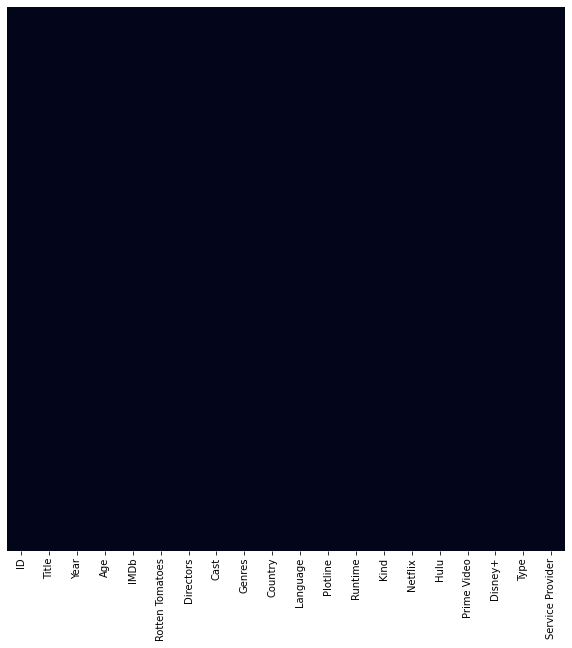

In [10]:
data_investigate(df_movies)

In [11]:
df_movies.head()

ID                           Title  Year Age IMDb Rotten Tomatoes  \
0   1                       Inception  2010  13  8.8              87   
1   2                      The Matrix  1999  16  8.7              88   
2   3          Avengers: Infinity War  2018  13  8.4              85   
3   4              Back to the Future  1985   7  8.5              96   
4   5  The Good, the Bad and the Ugly  1966  16  8.8              97   

                        Directors  \
0               Christopher Nolan   
1  Lana Wachowski,Lilly Wachowski   
2         Anthony Russo,Joe Russo   
3                 Robert Zemeckis   
4                    Sergio Leone   

                                                Cast  \
0  Leonardo DiCaprio,Joseph Gordon-Levitt,Elliot ...   
1  Keanu Reeves,Laurence Fishburne,Carrie-Anne Mo...   
2  Robert Downey Jr.,Chris Hemsworth,Mark Ruffalo...   
3  Michael J. Fox,Christopher Lloyd,Lea Thompson,...   
4  Eli Wallach,Clint Eastwood,Lee Van Cleef,Aldo ...   

                             Genres                                 Country  \
0  Action,Adventure,Sci-Fi,Thriller            United States,United Kingdom   
1                     Action,Sci-Fi                           United States   
2           Action,Adventure,Sci-Fi                           United States   
3           Adventure,Comedy,Sci-Fi                           United States   
4                           Western  Italy,Spain,West Germany,United States   

                  Language                                           Plotline  \
0  English,Japanese,French  Dom Cobb is a skilled thief, the absolute best...   
1                  English  Thomas A. Anderson is a man living two lives. ...   
2                  English  As the Avengers and their allies have continue...   
3                  English  Marty McFly, a typical American teenager of th...   
4                  Italian  Blondie (The Good) (Clint Eastwood) is a profe...   

  Runtime   Kind  Netflix  Hulu  Prime Video  Disney+  Type Service Provider  
0     148  movie        1     0            0        0     0          Netflix  
1     136  movie        1     0            0        0     0          Netflix  
2     149  movie        1     0            0        0     0          Netflix  
3     116  movie        1     0            0        0     0          Netflix  
4     161  movie        1     0            1        0     0          Netflix

In [12]:
df_movies.describe()

ID          Year       Netflix          Hulu   Prime Video  \
count  16923.000000  16923.000000  16923.000000  16923.000000  16923.000000   
mean    8462.000000   2003.211901      0.214915      0.062637      0.727235   
std     4885.393638     20.526532      0.410775      0.242315      0.445394   
min        1.000000   1901.000000      0.000000      0.000000      0.000000   
25%     4231.500000   2001.000000      0.000000      0.000000      0.000000   
50%     8462.000000   2012.000000      0.000000      0.000000      1.000000   
75%    12692.500000   2016.000000      0.000000      0.000000      1.000000   
max    16923.000000   2020.000000      1.000000      1.000000      1.000000   

            Disney+     Type  
count  16923.000000  16923.0  
mean       0.033150      0.0  
std        0.179034      0.0  
min        0.000000      0.0  
25%        0.000000      0.0  
50%        0.000000      0.0  
75%        0.000000      0.0  
max        1.000000      0.0

In [13]:
df_movies.corr()

ID      Year   Netflix      Hulu  Prime Video   Disney+  \
ID           1.000000 -0.217816 -0.644470 -0.129926     0.469301  0.263530   
Year        -0.217816  1.000000  0.256151  0.101337    -0.255578 -0.047258   
Netflix     -0.644470  0.256151  1.000000 -0.118032    -0.745141 -0.089649   
Hulu        -0.129926  0.101337 -0.118032  1.000000    -0.284654 -0.039693   
Prime Video  0.469301 -0.255578 -0.745141 -0.284654     1.000000 -0.289008   
Disney+      0.263530 -0.047258 -0.089649 -0.039693    -0.289008  1.000000   
Type              NaN       NaN       NaN       NaN          NaN       NaN   

             Type  
ID            NaN  
Year          NaN  
Netflix       NaN  
Hulu          NaN  
Prime Video   NaN  
Disney+       NaN  
Type          NaN

In [14]:
# df_movies.sort_values('Year', ascending = True)
# df_movies.sort_values('IMDb', ascending = False)

In [15]:
# df_movies.to_csv(path_or_buf= '/content/drive/MyDrive/Files/updated_ottmovies.csv', index = False)
 
# path = '/content/drive/MyDrive/Files/'
 
# udf_movies = pd.read_csv(path + 'updated_ottmovies.csv')
 
# udf_movies

In [16]:
# df_netflix_movies = df_movies.loc[(df_movies['Netflix'] > 0)]
# df_hulu_movies = df_movies.loc[(df_movies['Hulu'] > 0)]
# df_prime_video_movies = df_movies.loc[(df_movies['Prime Video'] > 0)]
# df_disney_movies = df_movies.loc[(df_movies['Disney+'] > 0)]

In [17]:
df_netflix_only_movies = df_movies[(df_movies['Netflix'] == 1) & (df_movies['Hulu'] == 0) & (df_movies['Prime Video'] == 0 ) & (df_movies['Disney+'] == 0)]
df_hulu_only_movies = df_movies[(df_movies['Netflix'] == 0) & (df_movies['Hulu'] == 1) & (df_movies['Prime Video'] == 0 ) & (df_movies['Disney+'] == 0)]
df_prime_video_only_movies = df_movies[(df_movies['Netflix'] == 0) & (df_movies['Hulu'] == 0) & (df_movies['Prime Video'] == 1 ) & (df_movies['Disney+'] == 0)]
df_disney_only_movies = df_movies[(df_movies['Netflix'] == 0) & (df_movies['Hulu'] == 0) & (df_movies['Prime Video'] == 0 ) & (df_movies['Disney+'] == 1)]

In [18]:
df_movies_countries = df_movies.copy()

In [19]:
df_movies_countries.drop(df_movies_countries.loc[df_movies_countries['Country'] == "NA"].index, inplace = True)
# df_movies_countries = df_movies_countries[df_movies_countries.Country != "NA"]
# df_movies_countries['Country'] = df_movies_countries['Country'].astype(str)

In [20]:
df_movies_count_countries = df_movies_countries.copy()

In [21]:
df_movies_country = df_movies_countries.copy()

In [22]:
# Create countries dict where key=name and value = number of countries
 
countries = {}
 
for i in df_movies_count_countries['Country'].dropna():
    if i != "NA":
        #print(i,len(i.split(',')))
        countries[i] = len(i.split(','))
    else:
        countries[i] = 0
    
# Add this information to our dataframe as a new column
 
df_movies_count_countries['Number of Countries'] = df_movies_count_countries['Country'].map(countries).astype(int)

In [23]:
df_movies_mixed_countries = df_movies_count_countries.copy()

In [24]:
# Creating distinct dataframes only with the movies present on individual streaming platforms
netflix_countries_movies = df_movies_count_countries.loc[df_movies_count_countries['Netflix'] == 1]
hulu_countries_movies = df_movies_count_countries.loc[df_movies_count_countries['Hulu'] == 1]
prime_video_countries_movies = df_movies_count_countries.loc[df_movies_count_countries['Prime Video'] == 1]
disney_countries_movies = df_movies_count_countries.loc[df_movies_count_countries['Disney+'] == 1]

<Figure size 720x720 with 0 Axes>

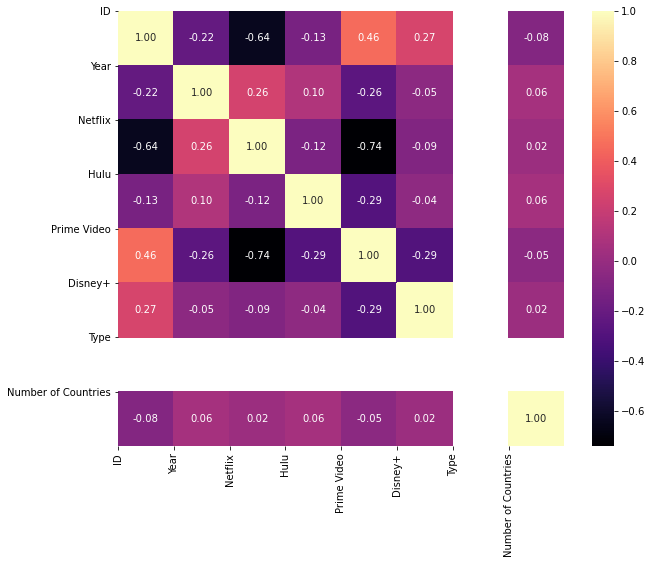

In [25]:
plt.figure(figsize = (10, 10))
corr = df_movies_count_countries.corr()
# Plot figsize
fig, ax = plt.subplots(figsize=(10, 8))
# Generate Heat Map, alleast annotations and place floats in map
sns.heatmap(corr, cmap = 'magma', annot = True, fmt = ".2f")
# Apply xticks
plt.xticks(range(len(corr.columns)), corr.columns);
# Apply yticks
plt.yticks(range(len(corr.columns)), corr.columns)
# show plot
plt.show()
fig.show()

In [26]:
df_countries_most_movies = df_movies_count_countries.sort_values(by = 'Number of Countries', ascending = False).reset_index()
df_countries_most_movies = df_countries_most_movies.drop(['index'], axis = 1)
# filter = (df_movies_count_countries['Number of Countries'] == (df_movies_count_countries['Number of Countries'].max()))
# df_countries_most_movies = df_movies_count_countries[filter]
 
# mostest_rated_movies = df_movies_count_countries.loc[df_movies_count_countries['Number of Countries'].idxmax()]
 
print('\nMovies with Highest Ever Number of Countries are : \n')
df_countries_most_movies.head(5)


Movies with Highest Ever Number of Countries are : 



ID                    Title  Year Age IMDb Rotten Tomatoes  \
0   6906  Somewhere Else Tomorrow  2013  13  7.5              NA   
1   6333            Poverty, Inc.  2014  NR  7.7              NA   
2   4382                  Samsara  2011  13  8.5              76   
3   8004               Lost Kites  2016  NR    7              NA   
4  16012                 Mulan II  2004   0  5.7               0   

                          Directors  \
0                      Daniel Rintz   
1           Michael Matheson Miller   
2                        Ron Fricke   
3       Samuel Rich,Gabriella Fritz   
4  Darrell Rooney,Lynne Southerland   

                                                Cast  \
0  Issa Breibish,Kristian Bruun,Megan Gay,Grant J...   
1                                      Robert Sirico   
2  Balinese Tari Legong Dancers,Ni Made Megahadi ...   
3                                                 NA   
4  Ming-Na Wen,BD Wong,Mark Moseley,Lucy Liu,Harv...   

                                   Genres  \
0        Documentary,Adventure,Drama,News   
1                Documentary,History,News   
2                       Documentary,Music   
3                             Documentary   
4  Animation,Action,Comedy,Family,Musical   

                                             Country  ...  \
0  Germany,Canada,Vietnam,United Kingdom,Turkey,T...  ...   
1  United States,United Kingdom,Thailand,Swazilan...  ...   
2  United States,Indonesia,Singapore,Thailand,Ken...  ...   
3  United States,Belgium,Brazil,Cambodia,China,In...  ...   
4  United States,South Korea,Singapore,Russia,Mal...  ...   

                                            Plotline Runtime   Kind Netflix  \
0  Promising young student Chi-Hao is sent away t...     107  movie       0   
1  The lady is Mrs. Hilyard, a wealthy poetess wh...      94  movie       0   
2                                                 NA     102  movie       0   
3  All fourteen-year-old Robbie Hendrick ever wan...      50  movie       0   
4  Tia and her brother Tony have supernatural pow...      79  movie       0   

   Hulu  Prime Video  Disney+  Type  Service Provider Number of Countries  
0     0            1        0     0       Prime Video                  27  
1     0            1        0     0       Prime Video                  20  
2     0            1        0     0       Prime Video                  19  
3     0            1        0     0       Prime Video                  18  
4     0            0        1     0           Disney+                  15  

[5 rows x 21 columns]

In [27]:
fig = px.bar(y = df_countries_most_movies['Title'][:15],
             x = df_countries_most_movies['Number of Countries'][:15], 
             color = df_countries_most_movies['Number of Countries'][:15],
             color_continuous_scale = 'Teal_r', 
             labels = { 'y' : 'Movies', 'x' : 'Number of Countries'},
             title  = 'Movies with Highest Number of Countries : All Platforms')

fig.update_layout(plot_bgcolor = 'white')
fig.show()

In [28]:
df_countries_least_movies = df_movies_count_countries.sort_values(by = 'Number of Countries', ascending = True).reset_index()
df_countries_least_movies = df_countries_least_movies.drop(['index'], axis = 1)
# filter = (df_movies_count_countries['Number of Countries'] == (df_movies_count_countries['Number of Countries'].min()))
# df_countries_least_movies = df_movies_count_countries[filter]

print('\nMovies with Lowest Ever Number of Countries are : \n')
df_countries_least_movies.head(5)


Movies with Lowest Ever Number of Countries are : 



ID                                              Title  Year Age IMDb  \
0   8436  Citizen Architect: Samuel Mockbee and the Spir...  2010  NR  7.6   
1  10816                    72 Hours: Martyr Who Never Died  2019  NR  5.2   
2  10817                                  Looking for Lenny  2011  13  6.2   
3  10818                                     Forest Fairies  2015   0  6.6   
4  10819                                      The Unwilling  2017  18  4.2   

  Rotten Tomatoes               Directors  \
0              NA  Sam Wainwright Douglas   
1              NA          Avinash Dhyani   
2              NA               Elan Gale   
3              NA          Justin G. Dyck   
4              95           Jonathan Heap   

                                                Cast  \
0                                                 NA   
1  Avinash Dhyani,Yeshi Dema,Alka Amin,Virendra S...   
2  Lenny Bruce,Richard Lewis,Robin Williams,Rosea...   
3  Emily Agard,Lora Burke,Brian Scott Carleton,Wi...   
4  David Lipper,Dina Meyer,Bree Williamson,Robert...   

                          Genres        Country  ...  \
0  Documentary,Biography,History  United States  ...   
1     Action,Biography,Drama,War          India  ...   
2                    Documentary  United States  ...   
3       Adventure,Family,Fantasy         Canada  ...   
4                Horror,Thriller  United States  ...   

                                            Plotline Runtime   Kind Netflix  \
0  Apollo 13 was supposed to be the third human s...      57  movie       0   
1                                                 NA     130  movie       0   
2  Twenty years have passed since Dr. Vincent Edw...      65  movie       0   
3  Bank comptroller John Hewitt is a much-respect...      90  movie       0   
4                                                 NA      84  movie       0   

   Hulu  Prime Video  Disney+  Type  Service Provider Number of Countries  
0     0            1        0     0       Prime Video                   1  
1     0            1        0     0       Prime Video                   1  
2     0            1        0     0       Prime Video                   1  
3     0            1        0     0       Prime Video                   1  
4     0            1        0     0       Prime Video                   1  

[5 rows x 21 columns]

In [29]:
fig = px.bar(y = df_countries_least_movies['Title'][:15],
             x = df_countries_least_movies['Number of Countries'][:15], 
             color = df_countries_least_movies['Number of Countries'][:15],
             color_continuous_scale = 'Teal_r', 
             labels = { 'y' : 'Movies', 'x' : 'Number of Countries'},
             title  = 'Movies with Lowest Number of Countries : All Platforms')

fig.update_layout(plot_bgcolor = 'white')
fig.show()

In [30]:
print(f'''
      Total '{df_movies_count_countries['Number of Countries'].unique().shape[0]}' unique Number of Countries s were Given, They were Like this,\n
      
      {df_movies_count_countries.sort_values(by = 'Number of Countries', ascending = False)['Number of Countries'].unique()}\n
 
      The Highest Number of Countries Ever Any Movie Got is '{df_countries_most_movies['Title'][0]}' : '{df_countries_most_movies['Number of Countries'].max()}'\n
 
      The Lowest Number of Countries Ever Any Movie Got is '{df_countries_least_movies['Title'][0]}' : '{df_countries_least_movies['Number of Countries'].min()}'\n
      ''')


      Total '16' unique Number of Countries s were Given, They were Like this,

      
      [27 20 19 18 15 11 10  9  8  7  6  5  4  3  2  1]

 
      The Highest Number of Countries Ever Any Movie Got is 'Somewhere Else Tomorrow' : '27'

 
      The Lowest Number of Countries Ever Any Movie Got is 'Citizen Architect: Samuel Mockbee and the Spirit of the Rural Studio' : '1'

      


In [31]:
netflix_countries_most_movies = df_countries_most_movies.loc[df_countries_most_movies['Netflix']==1].reset_index()
netflix_countries_most_movies = netflix_countries_most_movies.drop(['index'], axis = 1)
 
netflix_countries_least_movies = df_countries_least_movies.loc[df_countries_least_movies['Netflix']==1].reset_index()
netflix_countries_least_movies = netflix_countries_least_movies.drop(['index'], axis = 1)
 
netflix_countries_most_movies.head(5)

ID                                 Title  Year Age IMDb Rotten Tomatoes  \
0   287  A Shaun the Sheep Movie: Farmageddon  2019   0  6.8              96   
1  2880                The Thief and the Fool  2013  NR  7.1              NA   
2   781              Resident Evil: Afterlife  2010  16  6.3              22   
3   554             Resident Evil: Extinction  2007  16  6.3              24   
4  1644                           Arctic Dogs  2019   7  4.7              13   

                    Directors  \
0  Will Becher,Richard Phelan   
1            Richard Williams   
2             Russell Mulcahy   
3             Russell Mulcahy   
4               Aaron Woodley   

                                                Cast  \
0  Justin Fletcher,John Sparkes,Amalia Vitale,Kat...   
1  Vincent Price,Bobbi Page,Steve Lively,Ed E. Ca...   
2  Milla Jovovich,Oded Fehr,Ali Larter,Iain Glen,...   
3  Milla Jovovich,Oded Fehr,Ali Larter,Iain Glen,...   
4  Jeremy Renner,Heidi Klum,James Franco,John Cle...   

                                              Genres  \
0   Animation,Adventure,Comedy,Family,Fantasy,Sci-Fi   
1  Animation,Action,Adventure,Comedy,Family,Fanta...   
2                               Action,Horror,Sci-Fi   
3                               Action,Horror,Sci-Fi   
4                  Animation,Adventure,Comedy,Family   

                                             Country  ...  \
0  United Kingdom,France,Belgium,United States,Ch...  ...   
1  United Kingdom,United States,Canada,Taiwan,Ire...  ...   
2  France,Australia,Germany,United Kingdom,United...  ...   
3  France,Australia,Germany,United Kingdom,United...  ...   
4  India,United Kingdom,China,Canada,Japan,South ...  ...   

                                            Plotline Runtime   Kind Netflix  \
0  There is something strange going on in the pea...      86  movie       1   
1  When Tack upsets ZigZag the Vizier, the wizard...      90  movie       1   
2  Years after the Raccoon City disaster, Alice i...      94  movie       1   
3  Years after the Raccoon City disaster, Alice i...      94  movie       1   
4  Swifty the Arctic Fox (Jeremy Renner) works in...      92  movie       1   

   Hulu  Prime Video  Disney+  Type  Service Provider Number of Countries  
0     0            0        0     0           Netflix                  10  
1     0            0        0     0           Netflix                   9  
2     0            0        0     0           Netflix                   8  
3     0            0        0     0           Netflix                   8  
4     0            0        0     0           Netflix                   7  

[5 rows x 21 columns]

In [32]:
fig = px.bar(y = netflix_countries_most_movies['Title'][:15],
             x = netflix_countries_most_movies['Number of Countries'][:15], 
             color = netflix_countries_most_movies['Number of Countries'][:15],
             color_continuous_scale = 'Teal_r', 
             labels = { 'y' : 'Movies', 'x' : 'Number of Countries'},
             title  = 'Movies with Highest Number of Countries : Netflix')

fig.update_layout(plot_bgcolor = 'white')
fig.show()

In [33]:
fig = px.bar(y = netflix_countries_least_movies['Title'][:15],
             x = netflix_countries_least_movies['Number of Countries'][:15], 
             color = netflix_countries_least_movies['Number of Countries'][:15],
             color_continuous_scale = 'Teal_r', 
             labels = { 'y' : 'Movies', 'x' : 'Number of Countries'},
             title  = 'Movies with Lowest Number of Countries : Netflix')

fig.update_layout(plot_bgcolor = 'white')
fig.show()

In [34]:
hulu_countries_most_movies = df_countries_most_movies.loc[df_countries_most_movies['Hulu']==1].reset_index()
hulu_countries_most_movies = hulu_countries_most_movies.drop(['index'], axis = 1)
 
hulu_countries_least_movies = df_countries_least_movies.loc[df_countries_least_movies['Hulu']==1].reset_index()
hulu_countries_least_movies = hulu_countries_least_movies.drop(['index'], axis = 1)
 
hulu_countries_most_movies.head(5)

ID            Title  Year Age IMDb Rotten Tomatoes            Directors  \
0   3552            Monos  2019  16  6.9              92     Alejandro Landes   
1   3685        Manderlay  2005  NR  7.3              50       Lars von Trier   
2  16432      Underground  2016  18  8.1              96       Emir Kusturica   
3  16472   Curious George  2006   0  6.5              NA  Matthew O'Callaghan   
4   3947  Sherlock Gnomes  2018   7  5.2              27       John Stevenson   

                                                Cast  \
0  Sofia Buenaventura,Julián Giraldo,Karen Quinte...   
1  Bryce Dallas Howard,Isaach De Bankolé,Danny Gl...   
2  Predrag 'Miki' Manojlovic,Lazar Ristovski,Mirj...   
3  Frank Welker,Will Ferrell,Shane Baumel,Timyra-...   
4  Kelly Asbury,Mary J. Blige,Emily Blunt,Julio B...   

                                              Genres  \
0                           Adventure,Drama,Thriller   
1                                              Drama   
2                           Comedy,Drama,Fantasy,War   
3                  Animation,Adventure,Comedy,Family   
4  Animation,Adventure,Comedy,Family,Fantasy,Myst...   

                                             Country  ...  \
0  Colombia,Argentina,Netherlands,Germany,Sweden,...  ...   
1  Denmark,Sweden,Netherlands,France,Germany,Unit...  ...   
2  Federal Republic of Yugoslavia,France,Germany,...  ...   
3  United States,Germany,Taiwan,France,Canada,Sou...  ...   
4  United Kingdom,United States,India,Canada,Fran...  ...   

                                            Plotline Runtime   Kind Netflix  \
0  Teenage commandos perform military training ex...     102  movie       0   
1  After gangster Mulligan's (Willem Dafoe's) car...     139  movie       0   
2                                                 NA     170  movie       0   
3                                                 NA      87  movie       0   
4  Sherlock Gnomes (Johnny Depp) and his assistan...      86  movie       0   

   Hulu  Prime Video  Disney+  Type  Service Provider Number of Countries  
0     1            0        0     0              Hulu                  10  
1     1            0        0     0              Hulu                   8  
2     1            0        0     0              Hulu                   8  
3     1            0        0     0              Hulu                   8  
4     1            1        0     0       Prime Video                   6  

[5 rows x 21 columns]

In [35]:
fig = px.bar(y = hulu_countries_most_movies['Title'][:15],
             x = hulu_countries_most_movies['Number of Countries'][:15], 
             color = hulu_countries_most_movies['Number of Countries'][:15],
             color_continuous_scale = 'Teal_r', 
             labels = { 'y' : 'Movies', 'x' : 'Number of Countries'},
             title  = 'Movies with Highest Number of Countries : Hulu')

fig.update_layout(plot_bgcolor = 'white')
fig.show()

In [36]:
fig = px.bar(y = hulu_countries_least_movies['Title'][:15],
             x = hulu_countries_least_movies['Number of Countries'][:15], 
             color = hulu_countries_least_movies['Number of Countries'][:15],
             color_continuous_scale = 'Teal_r', 
             labels = { 'y' : 'Movies', 'x' : 'Number of Countries'},
             title  = 'Movies with Lowest Number of Countries : Hulu')

fig.update_layout(plot_bgcolor = 'white')
fig.show()

In [37]:
prime_video_countries_most_movies = df_countries_most_movies.loc[df_countries_most_movies['Prime Video']==1].reset_index()
prime_video_countries_most_movies = prime_video_countries_most_movies.drop(['index'], axis = 1)
 
prime_video_countries_least_movies = df_countries_least_movies.loc[df_countries_least_movies['Prime Video']==1].reset_index()
prime_video_countries_least_movies = prime_video_countries_least_movies.drop(['index'], axis = 1)
 
prime_video_countries_most_movies.head(5)

ID                    Title  Year Age IMDb Rotten Tomatoes  \
0   6906  Somewhere Else Tomorrow  2013  13  7.5              NA   
1   6333            Poverty, Inc.  2014  NR  7.7              NA   
2   4382                  Samsara  2011  13  8.5              76   
3   8004               Lost Kites  2016  NR    7              NA   
4  10318              Caffeinated  2015  NR  6.6              NA   

                     Directors  \
0                 Daniel Rintz   
1      Michael Matheson Miller   
2                   Ron Fricke   
3  Samuel Rich,Gabriella Fritz   
4   Hanh Nguyen,Vishal Solanki   

                                                Cast  \
0  Issa Breibish,Kristian Bruun,Megan Gay,Grant J...   
1                                      Robert Sirico   
2  Balinese Tari Legong Dancers,Ni Made Megahadi ...   
3                                                 NA   
4  Jeremy Adams,Andrew Alcala,Sarah Allen,Grazian...   

                             Genres  \
0  Documentary,Adventure,Drama,News   
1          Documentary,History,News   
2                 Documentary,Music   
3                       Documentary   
4        Documentary,Adventure,News   

                                             Country  ...  \
0  Germany,Canada,Vietnam,United Kingdom,Turkey,T...  ...   
1  United States,United Kingdom,Thailand,Swazilan...  ...   
2  United States,Indonesia,Singapore,Thailand,Ken...  ...   
3  United States,Belgium,Brazil,Cambodia,China,In...  ...   
4  United States,Colombia,Ethiopia,Guatemala,Hond...  ...   

                                            Plotline Runtime   Kind Netflix  \
0  Promising young student Chi-Hao is sent away t...     107  movie       0   
1  The lady is Mrs. Hilyard, a wealthy poetess wh...      94  movie       0   
2                                                 NA     102  movie       0   
3  All fourteen-year-old Robbie Hendrick ever wan...      50  movie       0   
4                                                 NA      80  movie       0   

   Hulu  Prime Video  Disney+  Type  Service Provider Number of Countries  
0     0            1        0     0       Prime Video                  27  
1     0            1        0     0       Prime Video                  20  
2     0            1        0     0       Prime Video                  19  
3     0            1        0     0       Prime Video                  18  
4     0            1        0     0       Prime Video                  15  

[5 rows x 21 columns]

In [38]:
fig = px.bar(y = prime_video_countries_most_movies['Title'][:15],
             x = prime_video_countries_most_movies['Number of Countries'][:15], 
             color = prime_video_countries_most_movies['Number of Countries'][:15],
             color_continuous_scale = 'Teal_r', 
             labels = { 'y' : 'Movies', 'x' : 'Number of Countries'},
             title  = 'Movies with Highest Number of Countries : Prime Video')

fig.update_layout(plot_bgcolor = 'white')
fig.show()

In [39]:
fig = px.bar(y = prime_video_countries_least_movies['Title'][:15],
             x = prime_video_countries_least_movies['Number of Countries'][:15], 
             color = prime_video_countries_least_movies['Number of Countries'][:15],
             color_continuous_scale = 'Teal_r', 
             labels = { 'y' : 'Movies', 'x' : 'Number of Countries'},
             title  = 'Movies with Lowest Number of Countries : Prime Video')

fig.update_layout(plot_bgcolor = 'white')
fig.show()

In [40]:
disney_countries_most_movies = df_countries_most_movies.loc[df_countries_most_movies['Disney+']==1].reset_index()
disney_countries_most_movies = disney_countries_most_movies.drop(['index'], axis = 1)
 
disney_countries_least_movies = df_countries_least_movies.loc[df_countries_least_movies['Disney+']==1].reset_index()
disney_countries_least_movies = disney_countries_least_movies.drop(['index'], axis = 1)
 
disney_countries_most_movies.head(5)

ID                                     Title  Year Age IMDb  \
0  16012                                  Mulan II  2004   0  5.7   
1  15984  The Little Mermaid II: Return to the Sea  2000   7  5.6   
2  15960                                Thumbelina  1994   0  6.4   
3  16196                                 The Flood  2018  16  5.9   
4  16069                         Into the Okavango  2018   7  7.6   

  Rotten Tomatoes                             Directors  \
0               0      Darrell Rooney,Lynne Southerland   
1              17  Jim Kammerud,Brian Smith,Bill Speers   
2              27                Don Bluth,Gary Goldman   
3              75                        Mikael Salomon   
4              NA                          Neil Gelinas   

                                                Cast  \
0  Ming-Na Wen,BD Wong,Mark Moseley,Lucy Liu,Harv...   
1  Jodi Benson,Samuel E. Wright,Tara Strong,Pat C...   
2  Gino Conforti,Barbara Cook,Jodi Benson,Will Ry...   
3  Morgan Freeman,Christian Slater,Randy Quaid,Mi...   
4  Chris Boyes,Jack Boyes,Steve Boyes,Adjany Cost...   

                                     Genres  \
0    Animation,Action,Comedy,Family,Musical   
1    Animation,Drama,Family,Fantasy,Musical   
2  Animation,Family,Fantasy,Musical,Romance   
3               Action,Crime,Drama,Thriller   
4                               Documentary   

                                             Country  ...  \
0  United States,South Korea,Singapore,Russia,Mal...  ...   
1  United States,Canada,Australia,Taiwan,Hong Kon...  ...   
2  Ireland,United States,Canada,United Kingdom,De...  ...   
3  United States,United Kingdom,Denmark,France,Ja...  ...   
4  United States,Angola,Botswana,Namibia,South Af...  ...   

                                            Plotline Runtime   Kind Netflix  \
0  Tia and her brother Tony have supernatural pow...      79  movie       0   
1  The Russo family and friends are headed to Tus...      75  movie       0   
2  The sultan is grooming Aladdin as new vizier, ...      86  movie       0   
3                                                 NA      97  movie       0   
4  As Tarzan and Jane's one-year wedding annivers...      88  movie       0   

   Hulu  Prime Video  Disney+  Type  Service Provider Number of Countries  
0     0            0        1     0           Disney+                  15  
1     0            0        1     0           Disney+                   8  
2     0            0        1     0           Disney+                   8  
3     0            0        1     0           Disney+                   8  
4     0            0        1     0           Disney+                   5  

[5 rows x 21 columns]

In [41]:
fig = px.bar(y = disney_countries_most_movies['Title'][:15],
             x = disney_countries_most_movies['Number of Countries'][:15], 
             color = disney_countries_most_movies['Number of Countries'][:15],
             color_continuous_scale = 'Teal_r', 
             labels = { 'y' : 'Movies', 'x' : 'Number of Countries'},
             title  = 'Movies with Highest Number of Countries : Disney+')

fig.update_layout(plot_bgcolor = 'white')
fig.show()

In [42]:
fig = px.bar(y = disney_countries_least_movies['Title'][:15],
             x = disney_countries_least_movies['Number of Countries'][:15], 
             color = disney_countries_least_movies['Number of Countries'][:15],
             color_continuous_scale = 'Teal_r', 
             labels = { 'y' : 'Movies', 'x' : 'Number of Countries'},
             title  = 'Movies with Lowest Number of Countries : Disney+')

fig.update_layout(plot_bgcolor = 'white')
fig.show()

In [43]:
print(f'''
      The Movie with Highest Number of Countries Ever Got is '{df_countries_most_movies['Title'][0]}' : '{df_countries_most_movies['Number of Countries'].max()}'\n
      The Movie with Lowest Number of Countries Ever Got is '{df_countries_least_movies['Title'][0]}' : '{df_countries_least_movies['Number of Countries'].min()}'\n
      
      The Movie with Highest Number of Countries on 'Netflix' is '{netflix_countries_most_movies['Title'][0]}' : '{netflix_countries_most_movies['Number of Countries'].max()}'\n
      The Movie with Lowest Number of Countries on 'Netflix' is '{netflix_countries_least_movies['Title'][0]}' : '{netflix_countries_least_movies['Number of Countries'].min()}'\n
      
      The Movie with Highest Number of Countries on 'Hulu' is '{hulu_countries_most_movies['Title'][0]}' : '{hulu_countries_most_movies['Number of Countries'].max()}'\n
      The Movie with Lowest Number of Countries on 'Hulu' is '{hulu_countries_least_movies['Title'][0]}' : '{hulu_countries_least_movies['Number of Countries'].min()}'\n
      
      The Movie with Highest Number of Countries on 'Prime Video' is '{prime_video_countries_most_movies['Title'][0]}' : '{prime_video_countries_most_movies['Number of Countries'].max()}'\n
      The Movie with Lowest Number of Countries on 'Prime Video' is '{prime_video_countries_least_movies['Title'][0]}' : '{prime_video_countries_least_movies['Number of Countries'].min()}'\n
      
      The Movie with Highest Number of Countries on 'Disney+' is '{disney_countries_most_movies['Title'][0]}' : '{disney_countries_most_movies['Number of Countries'].max()}'\n
      The Movie with Lowest Number of Countries on 'Disney+' is '{disney_countries_least_movies['Title'][0]}' : '{disney_countries_least_movies['Number of Countries'].min()}'\n 
      ''')


      The Movie with Highest Number of Countries Ever Got is 'Somewhere Else Tomorrow' : '27'

      The Movie with Lowest Number of Countries Ever Got is 'Citizen Architect: Samuel Mockbee and the Spirit of the Rural Studio' : '1'

      
      The Movie with Highest Number of Countries on 'Netflix' is 'A Shaun the Sheep Movie: Farmageddon' : '10'

      The Movie with Lowest Number of Countries on 'Netflix' is 'My Sassy Girl' : '1'

      
      The Movie with Highest Number of Countries on 'Hulu' is 'Monos' : '10'

      The Movie with Lowest Number of Countries on 'Hulu' is 'Side Effects' : '1'

      
      The Movie with Highest Number of Countries on 'Prime Video' is 'Somewhere Else Tomorrow' : '27'

      The Movie with Lowest Number of Countries on 'Prime Video' is 'Citizen Architect: Samuel Mockbee and the Spirit of the Rural Studio' : '1'

      
      The Movie with Highest Number of Countries on 'Disney+' is 'Mulan II' : '15'

      The Movie with Lowest Number of Countri

In [44]:
print(f'''
      Accross All Platforms the Average Number of Countries is '{round(df_movies_count_countries['Number of Countries'].mean(), ndigits = 2)}'\n
      The Average Number of Countries on 'Netflix' is '{round(netflix_countries_movies['Number of Countries'].mean(), ndigits = 2)}'\n
      The Average Number of Countries on 'Hulu' is '{round(hulu_countries_movies['Number of Countries'].mean(), ndigits = 2)}'\n
      The Average Number of Countries on 'Prime Video' is '{round(prime_video_countries_movies['Number of Countries'].mean(), ndigits = 2)}'\n
      The Average Number of Countries on 'Disney+' is '{round(disney_countries_movies['Number of Countries'].mean(), ndigits = 2)}'\n 
      ''')


      Accross All Platforms the Average Number of Countries is '1.29'

      The Average Number of Countries on 'Netflix' is '1.32'

      The Average Number of Countries on 'Hulu' is '1.48'

      The Average Number of Countries on 'Prime Video' is '1.27'

      The Average Number of Countries on 'Disney+' is '1.37'
 
      


In [45]:
print(f'''
      Accross All Platforms Total Count of Country is '{df_movies_count_countries['Number of Countries'].max()}'\n
      Total Count of Country on 'Netflix' is '{netflix_countries_movies['Number of Countries'].max()}'\n
      Total Count of Country on 'Hulu' is '{hulu_countries_movies['Number of Countries'].max()}'\n
      Total Count of Country on 'Prime Video' is '{prime_video_countries_movies['Number of Countries'].max()}'\n
      Total Count of Country on 'Disney+' is '{disney_countries_movies['Number of Countries'].max()}'\n 
      ''')


      Accross All Platforms Total Count of Country is '27'

      Total Count of Country on 'Netflix' is '10'

      Total Count of Country on 'Hulu' is '10'

      Total Count of Country on 'Prime Video' is '27'

      Total Count of Country on 'Disney+' is '15'
 
      


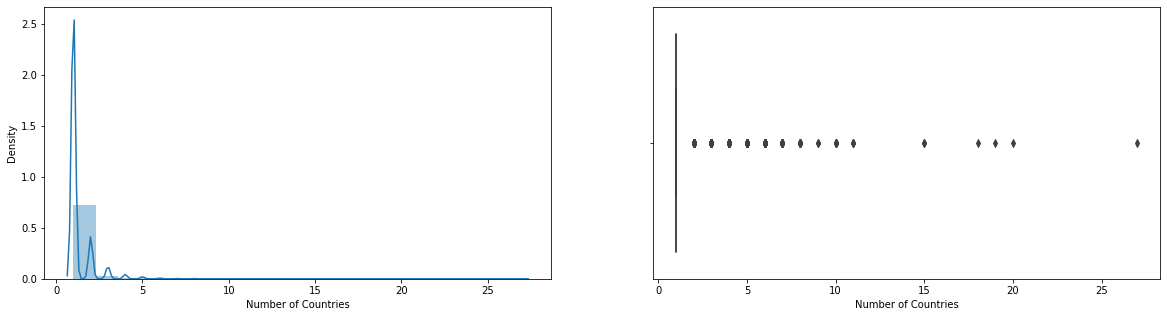

In [46]:
f, ax = plt.subplots(1, 2 , figsize = (20, 5))
sns.distplot(df_movies_count_countries['Number of Countries'],bins = 20, kde = True, ax = ax[0])
sns.boxplot(df_movies_count_countries['Number of Countries'], ax = ax[1])
plt.show()

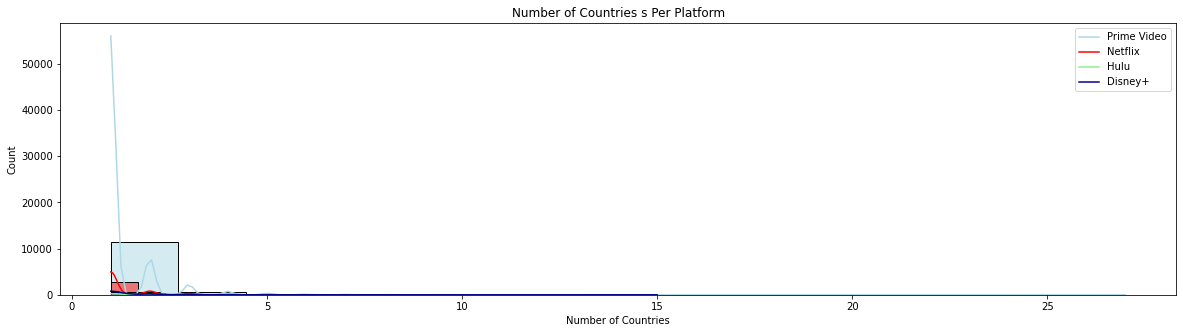

In [47]:
# Defining plot size and title
plt.figure(figsize = (20, 5))
plt.title('Number of Countries s Per Platform')
 
# Plotting the information from each dataset into a histogram
sns.histplot(prime_video_countries_movies['Number of Countries'], color = 'lightblue', legend = True, kde = True)
sns.histplot(netflix_countries_movies['Number of Countries'], color = 'red', legend = True, kde = True)
sns.histplot(hulu_countries_movies['Number of Countries'], color = 'lightgreen', legend = True, kde = True)
sns.histplot(disney_countries_movies['Number of Countries'], color = 'darkblue', legend = True, kde = True) 
 
# Setting the legend
plt.legend(['Prime Video', 'Netflix', 'Hulu', 'Disney+'])
plt.show()

In [48]:
df_lan = df_movies_country['Country'].str.split(',').apply(pd.Series).stack()
del df_movies_country['Country']
df_lan.index = df_lan.index.droplevel(-1)
df_lan.name = 'Country'
df_movies_country = df_movies_country.join(df_lan)
df_movies_country.drop_duplicates(inplace = True)

In [49]:
df_movies_country.head(5)

ID                   Title  Year Age IMDb Rotten Tomatoes  \
0   1               Inception  2010  13  8.8              87   
0   1               Inception  2010  13  8.8              87   
1   2              The Matrix  1999  16  8.7              88   
2   3  Avengers: Infinity War  2018  13  8.4              85   
3   4      Back to the Future  1985   7  8.5              96   

                        Directors  \
0               Christopher Nolan   
0               Christopher Nolan   
1  Lana Wachowski,Lilly Wachowski   
2         Anthony Russo,Joe Russo   
3                 Robert Zemeckis   

                                                Cast  \
0  Leonardo DiCaprio,Joseph Gordon-Levitt,Elliot ...   
0  Leonardo DiCaprio,Joseph Gordon-Levitt,Elliot ...   
1  Keanu Reeves,Laurence Fishburne,Carrie-Anne Mo...   
2  Robert Downey Jr.,Chris Hemsworth,Mark Ruffalo...   
3  Michael J. Fox,Christopher Lloyd,Lea Thompson,...   

                             Genres                 Language  \
0  Action,Adventure,Sci-Fi,Thriller  English,Japanese,French   
0  Action,Adventure,Sci-Fi,Thriller  English,Japanese,French   
1                     Action,Sci-Fi                  English   
2           Action,Adventure,Sci-Fi                  English   
3           Adventure,Comedy,Sci-Fi                  English   

                                            Plotline Runtime   Kind  Netflix  \
0  Dom Cobb is a skilled thief, the absolute best...     148  movie        1   
0  Dom Cobb is a skilled thief, the absolute best...     148  movie        1   
1  Thomas A. Anderson is a man living two lives. ...     136  movie        1   
2  As the Avengers and their allies have continue...     149  movie        1   
3  Marty McFly, a typical American teenager of th...     116  movie        1   

   Hulu  Prime Video  Disney+  Type Service Provider         Country  
0     0            0        0     0          Netflix   United States  
0     0            0        0     0          Netflix  United Kingdom  
1     0            0        0     0          Netflix   United States  
2     0            0        0     0          Netflix   United States  
3     0            0        0     0          Netflix   United States

In [50]:
country_count = df_movies_country.groupby('Country')['Title'].count()
country_movies = df_movies_country.groupby('Country')[['Netflix', 'Hulu', 'Prime Video', 'Disney+']].sum()
country_data_movies = pd.concat([country_count, country_movies], axis = 1).reset_index().rename(columns = {'Title' : 'Movies Count'})
country_data_movies = country_data_movies.sort_values(by = 'Movies Count', ascending = False)

In [51]:
# Creating distinct dataframes only with the movies present on individual streaming platforms
netflix_country_movies = country_data_movies[country_data_movies['Netflix'] !=  0].sort_values(by = 'Netflix', ascending = False).reset_index()
netflix_country_movies = netflix_country_movies.drop(['index', 'Hulu', 'Prime Video', 'Disney+', 'Movies Count'], axis = 1)

hulu_country_movies = country_data_movies[country_data_movies['Hulu'] !=  0].sort_values(by = 'Hulu', ascending = False).reset_index()
hulu_country_movies = hulu_country_movies.drop(['index', 'Netflix', 'Prime Video', 'Disney+', 'Movies Count'], axis = 1)

prime_video_country_movies = country_data_movies[country_data_movies['Prime Video'] !=  0].sort_values(by = 'Prime Video', ascending = False).reset_index()
prime_video_country_movies = prime_video_country_movies.drop(['index', 'Netflix', 'Hulu', 'Disney+', 'Movies Count'], axis = 1)

disney_country_movies = country_data_movies[country_data_movies['Disney+'] !=  0].sort_values(by = 'Disney+', ascending = False).reset_index()
disney_country_movies = disney_country_movies.drop(['index', 'Netflix', 'Hulu', 'Prime Video', 'Movies Count'], axis = 1)

In [52]:
# Country with Movies Counts - All Platforms Combined
country_data_movies.sort_values(by = 'Movies Count', ascending = False)[:10]

Country  Movies Count  Netflix  Hulu  Prime Video  Disney+
159   United States         10771     1800   790         8040      546
158  United Kingdom          1815      354   147         1331       61
26           Canada          1175      224    93          857       40
65            India          1143      569     9          659        4
52           France           791      188    83          537       16
54          Germany           527      125    44          380        5
72            Italy           450       58    18          386        1
8         Australia           342       65    24          244       21
138           Spain           333      125    24          195        1
74            Japan           305       95    45          168        7

In [53]:
fig = px.bar(x = country_data_movies['Country'][:50],
             y = country_data_movies['Movies Count'][:50], 
             color = country_data_movies['Movies Count'][:50],
             color_continuous_scale = 'Teal_r', 
             labels = { 'x' : 'Country', 'y' : 'Movies Count'},
             title  = 'Major Countries : All Platforms')

fig.update_layout(plot_bgcolor = 'white')
fig.show()

In [54]:
fig = px.choropleth(data_frame = country_data_movies, locations = 'Country', locationmode = 'country names', color = 'Movies Count', color_continuous_scale = 'deep')

fig.show()

In [55]:
df_country_high_movies = country_data_movies.sort_values(by = 'Movies Count', ascending = False).reset_index()
df_country_high_movies = df_country_high_movies.drop(['index'], axis = 1)
# filter = (country_data_movies['Movies Count'] == (country_data_movies['Movies Count'].max()))
# df_country_high_movies = country_data_movies[filter]
 
# highest_rated_movies = country_data_movies.loc[country_data_movies['Movies Count'].idxmax()]
 
print('\nCountry with Highest Ever Movies Count are : All Platforms Combined\n')
df_country_high_movies.head(5)


Country with Highest Ever Movies Count are : All Platforms Combined



Country  Movies Count  Netflix  Hulu  Prime Video  Disney+
0   United States         10771     1800   790         8040      546
1  United Kingdom          1815      354   147         1331       61
2          Canada          1175      224    93          857       40
3           India          1143      569     9          659        4
4          France           791      188    83          537       16

In [56]:
fig = px.bar(y = df_country_high_movies['Country'][:15],
             x = df_country_high_movies['Movies Count'][:15], 
             color = df_country_high_movies['Movies Count'][:15],
             color_continuous_scale = 'Teal_r', 
             labels = { 'y' : 'Country', 'x' : 'Movies Count'},
             title  = 'Country with Highest Movies : All Platforms')

fig.update_layout(plot_bgcolor = 'white')
fig.show()

In [57]:
df_country_low_movies = country_data_movies.sort_values(by = 'Movies Count', ascending = True).reset_index()
df_country_low_movies = df_country_low_movies.drop(['index'], axis = 1)
# filter = (country_data_movies['Movies Count'] == (country_data_movies['Movies Count'].min()))
# df_country_low_movies = country_data_movies[filter]

print('\nCountry with Lowest Ever Movies Count are : All Platforms Combined\n')
df_country_low_movies.head(5)


Country with Lowest Ever Movies Count are : All Platforms Combined



Country  Movies Count  Netflix  Hulu  Prime Video  Disney+
0                Macao             1        0     0            1        0
1  U.S. Virgin Islands             1        0     0            1        0
2             Botswana             1        0     0            0        1
3              Vanuatu             1        0     0            1        0
4              Bahrain             1        0     0            1        0

In [58]:
fig = px.bar(y = df_country_low_movies['Country'][:15],
             x = df_country_low_movies['Movies Count'][:15], 
             color = df_country_low_movies['Movies Count'][:15],
             color_continuous_scale = 'Teal_r', 
             labels = { 'y' : 'Country', 'x' : 'Movies Count'},
             title  = 'Country with Lowest Movies Count : All Platforms')

fig.update_layout(plot_bgcolor = 'white')
fig.show()

In [59]:
print(f'''
      Total '{country_data_movies['Country'].unique().shape[0]}' unique Country Count s were Given, They were Like this,\n
      
      {country_data_movies.sort_values(by = 'Movies Count', ascending = False)['Country'].unique()[:5]}\n
 
      The Highest Ever Movies Count Ever Any Movie Got is '{df_country_high_movies['Country'][0]}' : '{df_country_high_movies['Movies Count'].max()}'\n
 
      The Lowest Ever Movies Count Ever Any Movie Got is '{df_country_low_movies['Country'][0]}' : '{df_country_low_movies['Movies Count'].min()}'\n
      ''')


      Total '169' unique Country Count s were Given, They were Like this,

      
      ['United States' 'United Kingdom' 'Canada' 'India' 'France']

 
      The Highest Ever Movies Count Ever Any Movie Got is 'United States' : '10771'

 
      The Lowest Ever Movies Count Ever Any Movie Got is 'Macao' : '1'

      


In [60]:
fig = px.pie(country_data_movies[:10], names = 'Country', values = 'Movies Count', color_discrete_sequence = px.colors.sequential.Teal)
fig.update_traces(textposition = 'inside', textinfo = 'percent+label', title = 'Movies Count based on Country')
fig.show()

In [61]:
# netflix_country_movies = country_data_movies[country_data_movies['Netflix'] !=  0].sort_values(by = 'Netflix', ascending = False).reset_index()
# netflix_country_movies = netflix_country_movies.drop(['index', 'Hulu', 'Prime Video', 'Disney+', 'Movies Count'], axis = 1)
 
netflix_country_high_movies = df_country_high_movies.sort_values(by = 'Netflix', ascending = False).reset_index()
netflix_country_high_movies = netflix_country_high_movies.drop(['index'], axis = 1)
 
netflix_country_low_movies = df_country_high_movies.sort_values(by = 'Netflix', ascending = True).reset_index()
netflix_country_low_movies = netflix_country_low_movies.drop(['index'], axis = 1)
 
netflix_country_high_movies.head(5)

Country  Movies Count  Netflix  Hulu  Prime Video  Disney+
0   United States         10771     1800   790         8040      546
1           India          1143      569     9          659        4
2  United Kingdom          1815      354   147         1331       61
3          Canada          1175      224    93          857       40
4          France           791      188    83          537       16

In [62]:
fig = px.bar(x = netflix_country_high_movies['Country'][:15],
             y = netflix_country_high_movies['Netflix'][:15], 
             color = netflix_country_high_movies['Netflix'][:15],
             color_continuous_scale = 'Teal_r', 
             labels = { 'y' : 'Country', 'x' : 'Movies Count'},
             title  = 'Country with Highest Movies : Netflix')

fig.update_layout(plot_bgcolor = 'white')
fig.show()

In [63]:
fig = px.choropleth(data_frame = netflix_country_movies, locations = 'Country', locationmode = 'country names', color = 'Netflix', color_continuous_scale = 'Reds')

fig.show()

In [64]:
# hulu_country_movies = country_data_movies[country_data_movies['Hulu'] !=  0].sort_values(by = 'Hulu', ascending = False).reset_index()
# hulu_country_movies = hulu_country_movies.drop(['index', 'Netflix', 'Prime Video', 'Disney+', 'Movies Count'], axis = 1)
 
hulu_country_high_movies = df_country_high_movies.sort_values(by = 'Hulu', ascending = False).reset_index()
hulu_country_high_movies = hulu_country_high_movies.drop(['index'], axis = 1)
 
hulu_country_low_movies = df_country_high_movies.sort_values(by = 'Hulu', ascending = True).reset_index()
hulu_country_low_movies = hulu_country_low_movies.drop(['index'], axis = 1)
 
hulu_country_high_movies.head(5)

Country  Movies Count  Netflix  Hulu  Prime Video  Disney+
0   United States         10771     1800   790         8040      546
1  United Kingdom          1815      354   147         1331       61
2          Canada          1175      224    93          857       40
3          France           791      188    83          537       16
4           Japan           305       95    45          168        7

In [65]:
fig = px.bar(x = hulu_country_high_movies['Country'][:15],
             y = hulu_country_high_movies['Hulu'][:15], 
             color = hulu_country_high_movies['Hulu'][:15],
             color_continuous_scale = 'Teal_r', 
             labels = { 'y' : 'Country', 'x' : 'Movies Count'},
             title  = 'Country with Highest Movies : Hulu')

fig.update_layout(plot_bgcolor = 'white')
fig.show()

In [66]:
fig = px.choropleth(data_frame = hulu_country_movies, locations = 'Country', locationmode = 'country names', color = 'Hulu', color_continuous_scale = 'Greens')

fig.show()

In [67]:
# prime_video_country_movies = country_data_movies[country_data_movies['Prime Video'] !=  0].sort_values(by = 'Prime Video', ascending = False).reset_index()
# prime_video_country_movies = prime_video_country_movies.drop(['index', 'Netflix', 'Hulu', 'Disney+', 'Movies Count'], axis = 1)
 
prime_video_country_high_movies = df_country_high_movies.sort_values(by = 'Prime Video', ascending = False).reset_index()
prime_video_country_high_movies = prime_video_country_high_movies.drop(['index'], axis = 1)
 
prime_video_country_low_movies = df_country_high_movies.sort_values(by = 'Prime Video', ascending = True).reset_index()
prime_video_country_low_movies = prime_video_country_low_movies.drop(['index'], axis = 1)
 
prime_video_country_high_movies.head(5)

Country  Movies Count  Netflix  Hulu  Prime Video  Disney+
0   United States         10771     1800   790         8040      546
1  United Kingdom          1815      354   147         1331       61
2          Canada          1175      224    93          857       40
3           India          1143      569     9          659        4
4          France           791      188    83          537       16

In [68]:
fig = px.bar(x = prime_video_country_high_movies['Country'][:15],
             y = prime_video_country_high_movies['Prime Video'][:15], 
             color = prime_video_country_high_movies['Prime Video'][:15],
             color_continuous_scale = 'Teal_r', 
             labels = { 'y' : 'Country', 'x' : 'Movies Count'},
             title  = 'Country with Highest Movies : Prime Video')

fig.update_layout(plot_bgcolor = 'white')
fig.show()

In [69]:
fig = px.choropleth(data_frame = prime_video_country_movies, locations = 'Country', locationmode = 'country names', color = 'Prime Video', color_continuous_scale = 'Blues')

fig.show()

In [70]:
# disney_country_movies = country_data_movies[country_data_movies['Disney+'] !=  0].sort_values(by = 'Disney+', ascending = False).reset_index()
# disney_country_movies = disney_country_movies.drop(['index', 'Netflix', 'Hulu', 'Prime Video', 'Movies Count'], axis = 1)
 
disney_country_high_movies = df_country_high_movies.sort_values(by = 'Disney+', ascending = False).reset_index()
disney_country_high_movies = disney_country_high_movies.drop(['index'], axis = 1)
 
disney_country_low_movies = df_country_high_movies.sort_values(by = 'Disney+', ascending = True).reset_index()
disney_country_low_movies = disney_country_low_movies.drop(['index'], axis = 1)
 
disney_country_high_movies.head(5)

Country  Movies Count  Netflix  Hulu  Prime Video  Disney+
0   United States         10771     1800   790         8040      546
1  United Kingdom          1815      354   147         1331       61
2          Canada          1175      224    93          857       40
3       Australia           342       65    24          244       21
4          France           791      188    83          537       16

In [71]:
fig = px.bar(x = disney_country_high_movies['Country'][:15],
             y = disney_country_high_movies['Disney+'][:15], 
             color = disney_country_high_movies['Disney+'][:15],
             color_continuous_scale = 'Teal_r', 
             labels = { 'y' : 'Country', 'x' : 'Movies Count'},
             title  = 'Country with Highest Movies : Disney+')

fig.update_layout(plot_bgcolor = 'white')
fig.show()

In [72]:
fig = px.choropleth(data_frame = disney_country_movies, locations = 'Country', locationmode = 'country names', color = 'Disney+', color_continuous_scale = 'BuPu')

fig.show()

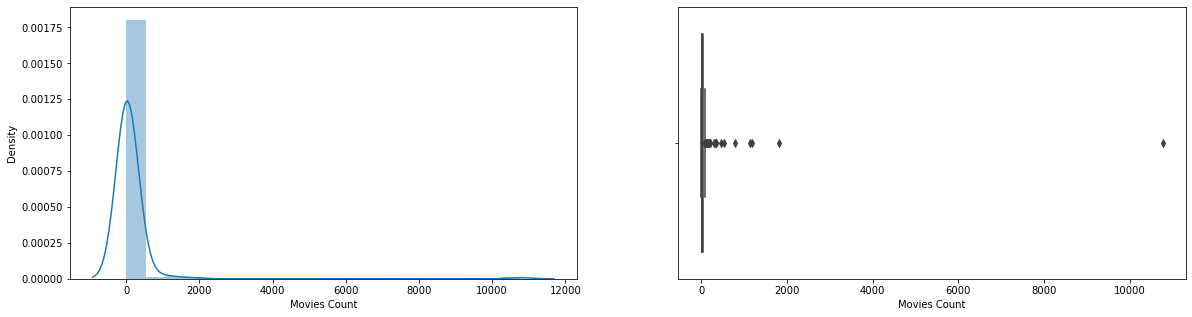

In [73]:
f, ax = plt.subplots(1, 2 , figsize = (20, 5))
sns.distplot(country_data_movies['Movies Count'], bins = 20, kde = True, ax = ax[0])
sns.boxplot(country_data_movies['Movies Count'], ax = ax[1])
plt.show()

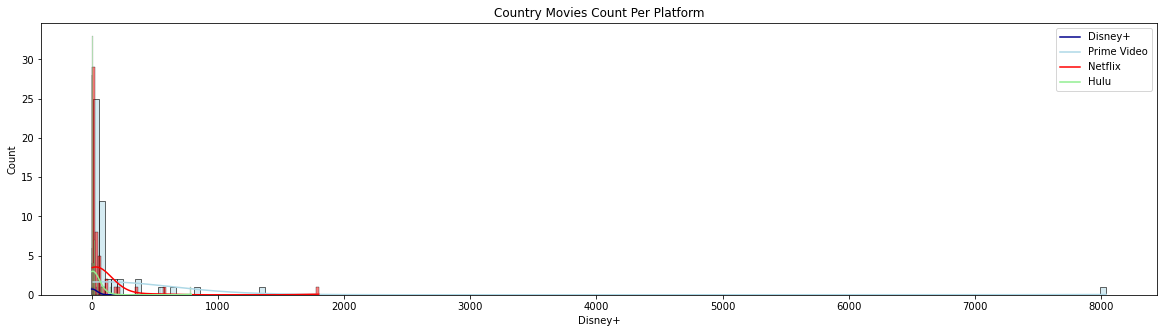

In [74]:
# Defining plot size and title
plt.figure(figsize = (20, 5))
plt.title('Country Movies Count Per Platform')
 
# Plotting the information from each dataset into a histogram
 
sns.histplot(disney_country_movies['Disney+'][:50], color = 'darkblue', legend = True, kde = True)  
sns.histplot(prime_video_country_movies['Prime Video'][:50], color = 'lightblue', legend = True, kde = True)
sns.histplot(netflix_country_movies['Netflix'][:50], color = 'red', legend = True, kde = True)
sns.histplot(hulu_country_movies['Hulu'][:50], color = 'lightgreen', legend = True, kde = True)                                
 
# Setting the legend
plt.legend(['Disney+', 'Prime Video', 'Netflix', 'Hulu'])
plt.show()

In [75]:
print(f'''
      The Country with Highest Movies Count Ever Got is '{df_country_high_movies['Country'][0]}' : '{df_country_high_movies['Movies Count'].max()}'\n
      The Country with Lowest Movies Count Ever Got is '{df_country_low_movies['Country'][0]}' : '{df_country_low_movies['Movies Count'].min()}'\n
      
      The Country with Highest Movies Count on 'Netflix' is '{netflix_country_high_movies['Country'][0]}' : '{netflix_country_high_movies['Netflix'].max()}'\n
      The Country with Lowest Movies Count on 'Netflix' is '{netflix_country_low_movies['Country'][0]}' : '{netflix_country_low_movies['Netflix'].min()}'\n
      
      The Country with Highest Movies Count on 'Hulu' is '{hulu_country_high_movies['Country'][0]}' : '{hulu_country_high_movies['Hulu'].max()}'\n
      The Country with Lowest Movies Count on 'Hulu' is '{hulu_country_low_movies['Country'][0]}' : '{hulu_country_low_movies['Hulu'].min()}'\n
      
      The Country with Highest Movies Count on 'Prime Video' is '{prime_video_country_high_movies['Country'][0]}' : '{prime_video_country_high_movies['Prime Video'].max()}'\n
      The Country with Lowest Movies Count on 'Prime Video' is '{prime_video_country_low_movies['Country'][0]}' : '{prime_video_country_low_movies['Prime Video'].min()}'\n
      
      The Country with Highest Movies Count on 'Disney+' is '{disney_country_high_movies['Country'][0]}' : '{disney_country_high_movies['Disney+'].max()}'\n
      The Country with Lowest Movies Count on 'Disney+' is '{disney_country_low_movies['Country'][0]}' : '{disney_country_low_movies['Disney+'].min()}'\n 
      ''')


      The Country with Highest Movies Count Ever Got is 'United States' : '10771'

      The Country with Lowest Movies Count Ever Got is 'Macao' : '1'

      
      The Country with Highest Movies Count on 'Netflix' is 'United States' : '1800'

      The Country with Lowest Movies Count on 'Netflix' is 'Macao' : '0'

      
      The Country with Highest Movies Count on 'Hulu' is 'United States' : '790'

      The Country with Lowest Movies Count on 'Hulu' is 'Macao' : '0'

      
      The Country with Highest Movies Count on 'Prime Video' is 'United States' : '8040'

      The Country with Lowest Movies Count on 'Prime Video' is 'Federal Republic of Yugoslavia' : '0'

      
      The Country with Highest Movies Count on 'Disney+' is 'United States' : '546'

      The Country with Lowest Movies Count on 'Disney+' is 'Albania' : '0'
 
      


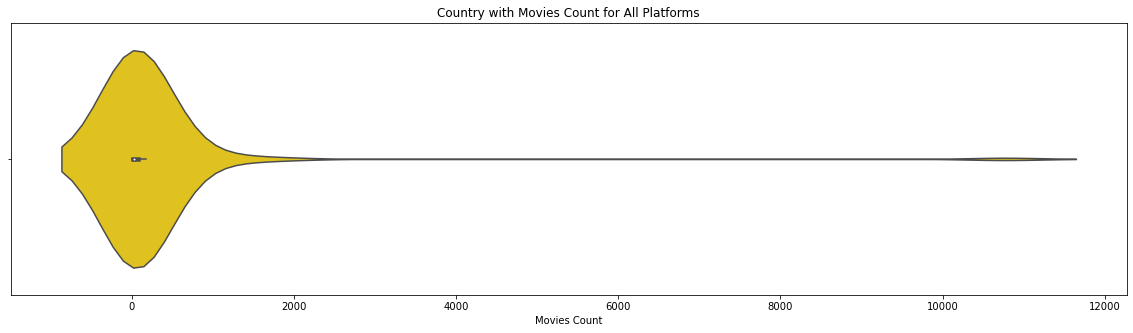

In [76]:
# Distribution of movies country in each platform
plt.figure(figsize = (20, 5))
plt.title('Country with Movies Count for All Platforms')
sns.violinplot(x = country_data_movies['Movies Count'][:100], color = 'gold', legend = True, kde = True, shade = False)
plt.show()

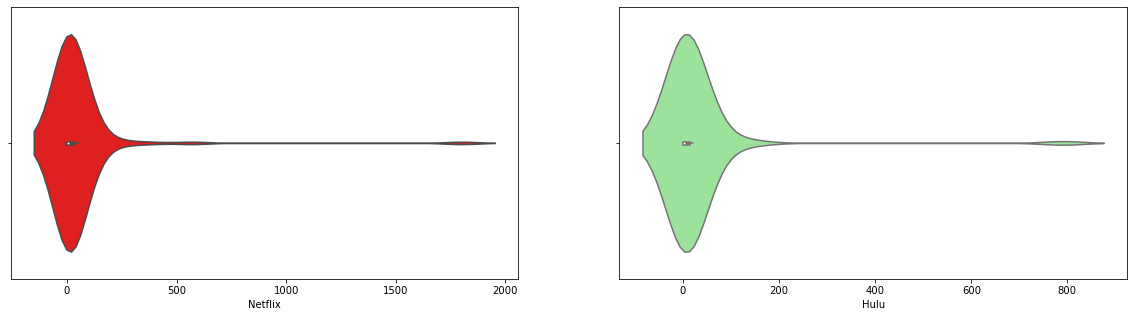

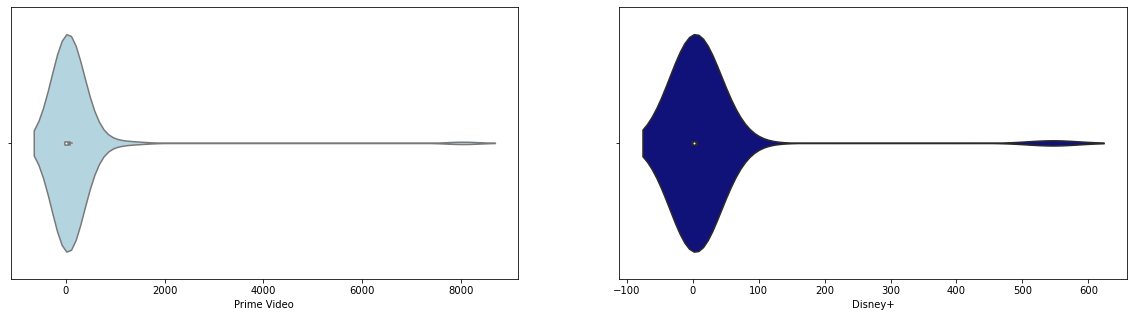

In [77]:
# Distribution of Country Movies Count in each platform
f1, ax1 = plt.subplots(1, 2 , figsize = (20, 5))
sns.violinplot(x = netflix_country_movies['Netflix'][:100], color = 'red', ax = ax1[0])
sns.violinplot(x = hulu_country_movies['Hulu'][:100], color = 'lightgreen', ax = ax1[1])
 
f2, ax2 = plt.subplots(1, 2 , figsize = (20, 5))
sns.violinplot(x = prime_video_country_movies['Prime Video'][:100], color = 'lightblue', ax = ax2[0])
sns.violinplot(x = disney_country_movies['Disney+'][:100], color = 'darkblue', ax = ax2[1])
plt.show()

In [78]:
print(f'''
      Accross All Platforms the Average Movies Count of Country is '{round(country_data_movies['Movies Count'].mean(), ndigits = 2)}'\n
      The Average Movies Count of Country on 'Netflix' is '{round(netflix_country_movies['Netflix'].mean(), ndigits = 2)}'\n
      The Average Movies Count of Country on 'Hulu' is '{round(hulu_country_movies['Hulu'].mean(), ndigits = 2)}'\n
      The Average Movies Count of Country on 'Prime Video' is '{round(prime_video_country_movies['Prime Video'].mean(), ndigits = 2)}'\n
      The Average Movies Count of Country on 'Disney+' is '{round(disney_country_movies['Disney+'].mean(), ndigits = 2)}'\n 
      ''')


      Accross All Platforms the Average Movies Count of Country is '127.17'

      The Average Movies Count of Country on 'Netflix' is '45.85'

      The Average Movies Count of Country on 'Hulu' is '23.56'

      The Average Movies Count of Country on 'Prime Video' is '94.19'

      The Average Movies Count of Country on 'Disney+' is '17.41'
 
      


In [79]:
print(f'''
      Accross All Platforms Total Count of Country is '{country_data_movies['Country'].unique().shape[0]}'\n
      Total Count of Country on 'Netflix' is '{netflix_country_movies['Country'].unique().shape[0]}'\n
      Total Count of Country on 'Hulu' is '{hulu_country_movies['Country'].unique().shape[0]}'\n
      Total Count of Country on 'Prime Video' is '{prime_video_country_movies['Country'].unique().shape[0]}'\n
      Total Count of Country on 'Disney+' is '{disney_country_movies['Country'].unique().shape[0]}'\n 
      ''')


      Accross All Platforms Total Count of Country is '169'

      Total Count of Country on 'Netflix' is '102'

      Total Count of Country on 'Hulu' is '66'

      Total Count of Country on 'Prime Video' is '163'

      Total Count of Country on 'Disney+' is '44'
 
      


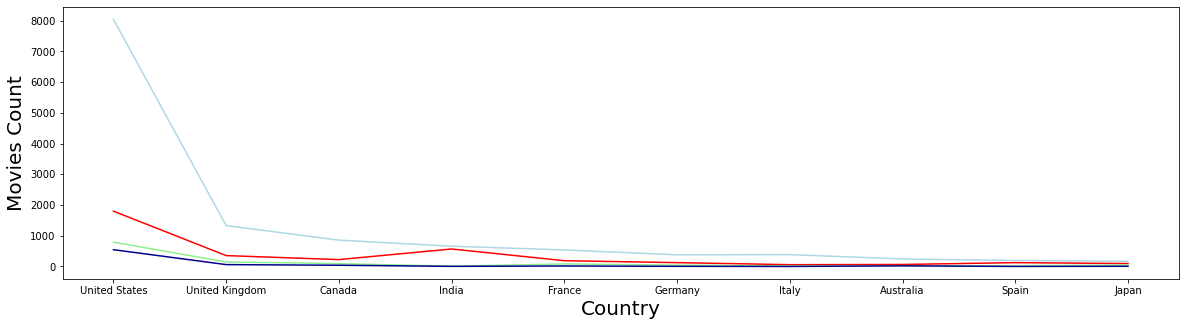

In [80]:
plt.figure(figsize = (20, 5))
sns.lineplot(x = country_data_movies['Country'][:10], y = country_data_movies['Netflix'][:10], color = 'red')
sns.lineplot(x = country_data_movies['Country'][:10], y = country_data_movies['Hulu'][:10], color = 'lightgreen')
sns.lineplot(x = country_data_movies['Country'][:10], y = country_data_movies['Prime Video'][:10], color = 'lightblue')
sns.lineplot(x = country_data_movies['Country'][:10], y = country_data_movies['Disney+'][:10], color = 'darkblue')
plt.xlabel('Country', fontsize = 20)
plt.ylabel('Movies Count', fontsize = 20)
plt.show()

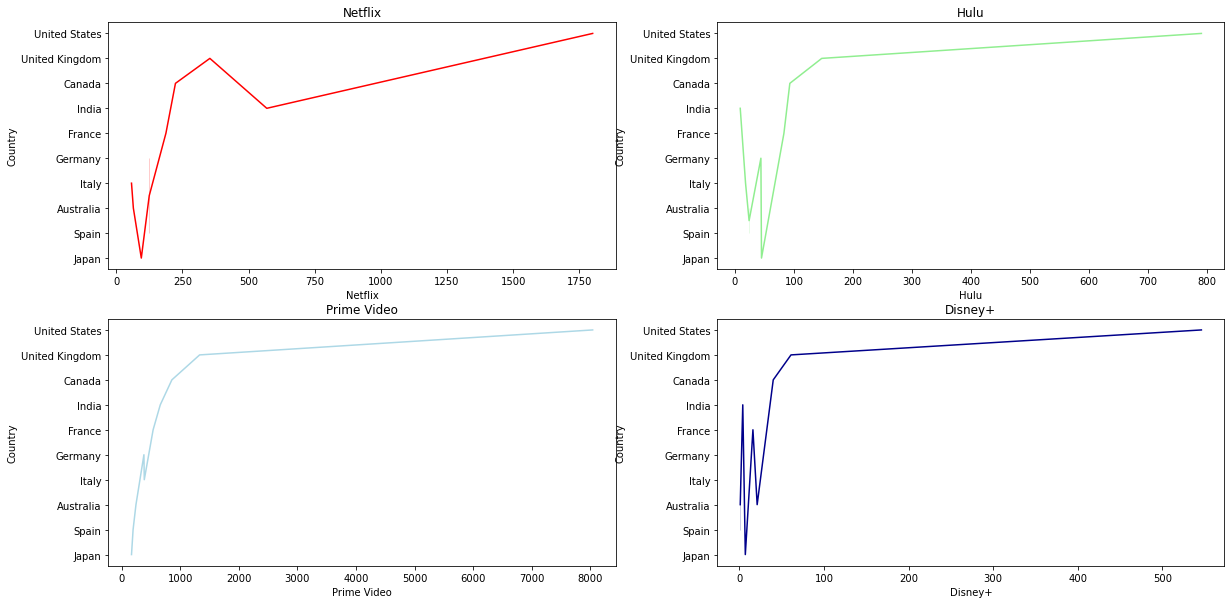

In [81]:
fig, axes = plt.subplots(2, 2, figsize = (20 , 10))
 
n_co_ax1 = sns.lineplot(y = country_data_movies['Country'][:10], x = country_data_movies['Netflix'][:10], color = 'red', ax = axes[0, 0])
h_co_ax2 = sns.lineplot(y = country_data_movies['Country'][:10], x = country_data_movies['Hulu'][:10], color = 'lightgreen', ax = axes[0, 1])
p_co_ax3 = sns.lineplot(y = country_data_movies['Country'][:10], x = country_data_movies['Prime Video'][:10], color = 'lightblue', ax = axes[1, 0])
d_co_ax4 = sns.lineplot(y = country_data_movies['Country'][:10], x = country_data_movies['Disney+'][:10], color = 'darkblue', ax = axes[1, 1])
 
labels = ['Netflix', 'Hulu', 'Prime Video', 'Disney+']
 
n_co_ax1.title.set_text(labels[0])
h_co_ax2.title.set_text(labels[1])
p_co_ax3.title.set_text(labels[2])
d_co_ax4.title.set_text(labels[3])
 
plt.show()

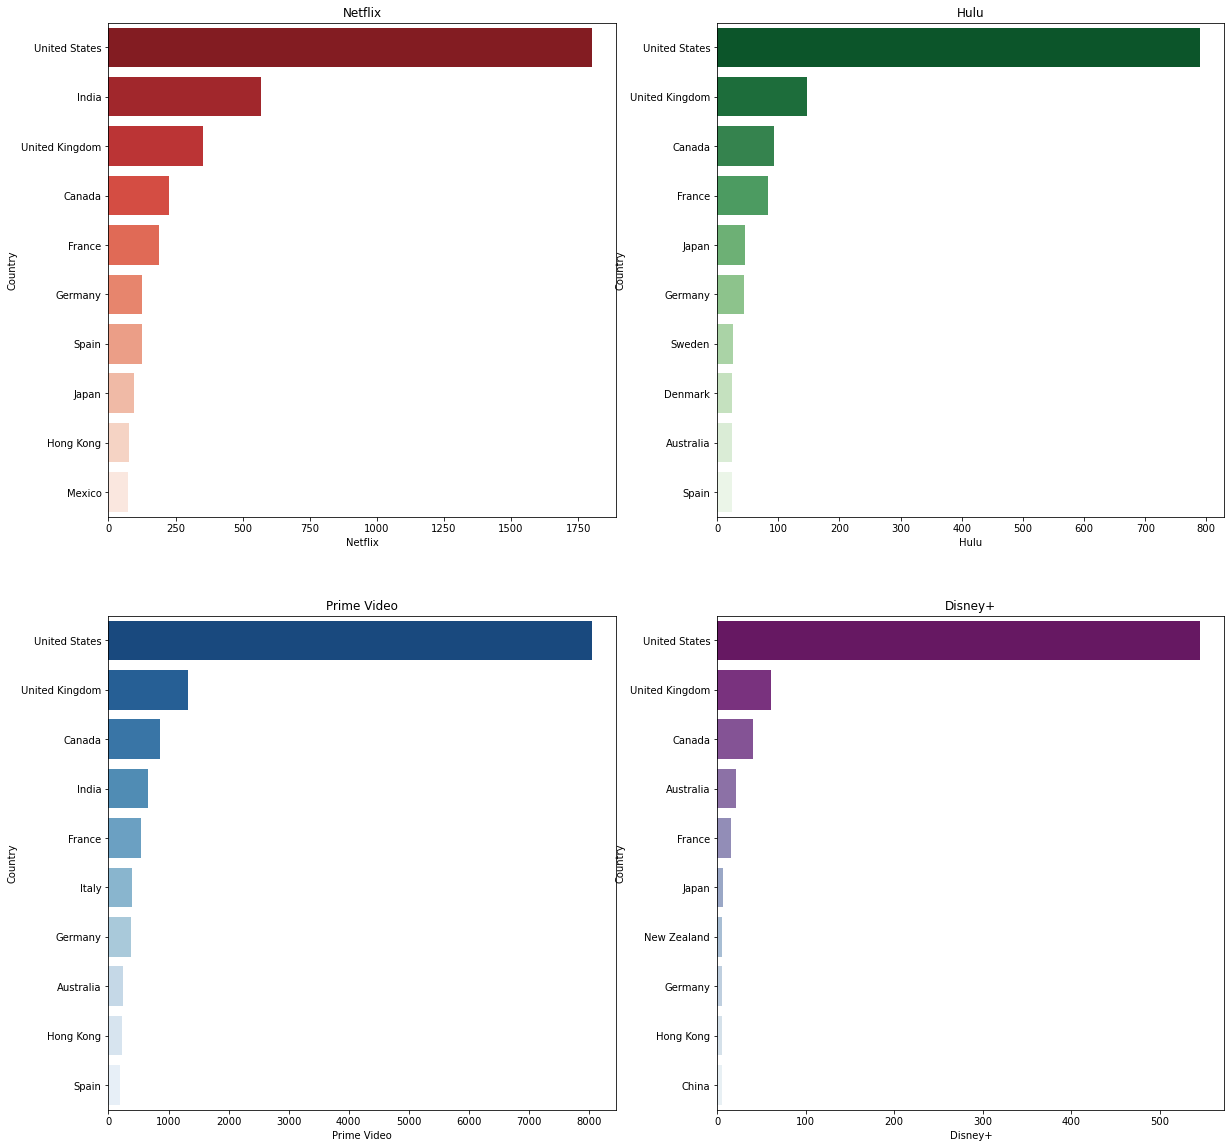

In [82]:
fig, axes = plt.subplots(2, 2, figsize = (20 , 20))
 
n_co_ax1 = sns.barplot(y = netflix_country_movies['Country'][:10], x = netflix_country_movies['Netflix'][:10], palette = 'Reds_r', ax = axes[0, 0])
h_co_ax2 = sns.barplot(y = hulu_country_movies['Country'][:10], x = hulu_country_movies['Hulu'][:10], palette = 'Greens_r', ax = axes[0, 1])
p_co_ax3 = sns.barplot(y = prime_video_country_movies['Country'][:10], x = prime_video_country_movies['Prime Video'][:10], palette = 'Blues_r', ax = axes[1, 0])
d_co_ax4 = sns.barplot(y = disney_country_movies['Country'][:10], x = disney_country_movies['Disney+'][:10], palette = 'BuPu_r', ax = axes[1, 1])
 
labels = ['Netflix', 'Hulu', 'Prime Video', 'Disney+']
 
n_co_ax1.title.set_text(labels[0])
h_co_ax2.title.set_text(labels[1])
p_co_ax3.title.set_text(labels[2])
d_co_ax4.title.set_text(labels[3])
 
plt.show()

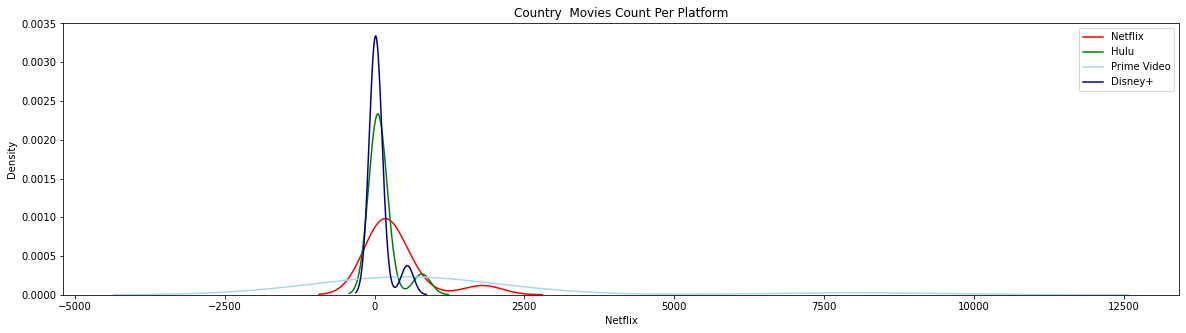

In [83]:
# Defining plot size and title
plt.figure(figsize = (20, 5))
plt.title('Country  Movies Count Per Platform')
 
# Plotting the information from each dataset into a histogram
sns.kdeplot(netflix_country_movies['Netflix'][:10], color = 'red', legend = True)
sns.kdeplot(hulu_country_movies['Hulu'][:10], color = 'green', legend = True)
sns.kdeplot(prime_video_country_movies['Prime Video'][:10], color = 'lightblue', legend = True)
sns.kdeplot(disney_country_movies['Disney+'][:10], color = 'darkblue', legend = True)                                      
                                      
# Setting the legend
plt.legend(['Netflix', 'Hulu', 'Prime Video', 'Disney+'])
plt.show()

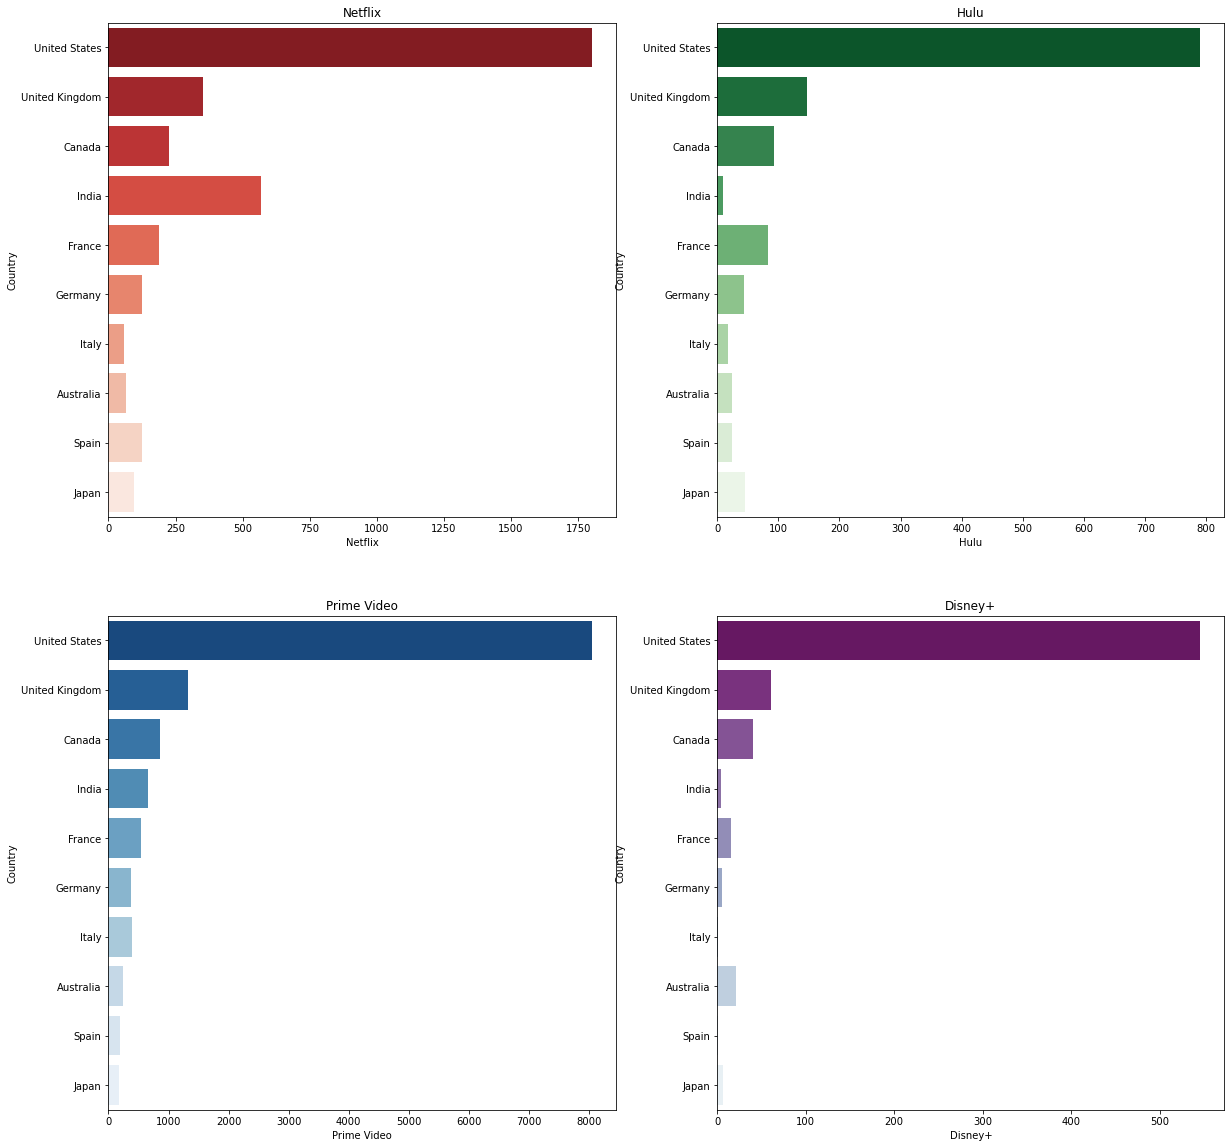

In [84]:
fig, axes = plt.subplots(2, 2, figsize = (20 , 20))
 
n_co_ax1 = sns.barplot(y = country_data_movies['Country'][:10], x = country_data_movies['Netflix'][:10], palette = 'Reds_r', ax = axes[0, 0])
h_co_ax2 = sns.barplot(y = country_data_movies['Country'][:10], x = country_data_movies['Hulu'][:10], palette = 'Greens_r', ax = axes[0, 1])
p_co_ax3 = sns.barplot(y = country_data_movies['Country'][:10], x = country_data_movies['Prime Video'][:10], palette = 'Blues_r', ax = axes[1, 0])
d_co_ax4 = sns.barplot(y = country_data_movies['Country'][:10], x = country_data_movies['Disney+'][:10], palette = 'BuPu_r', ax = axes[1, 1])
 
labels = ['Netflix', 'Hulu', 'Prime Video', 'Disney+']
 
n_co_ax1.title.set_text(labels[0])
h_co_ax2.title.set_text(labels[1])
p_co_ax3.title.set_text(labels[2])
d_co_ax4.title.set_text(labels[3])
 
plt.show()

In [85]:
df_movies_mixed_countries.drop(df_movies_mixed_countries.loc[df_movies_mixed_countries['Country'] == "NA"].index, inplace = True)
# df_movies_mixed_countries = df_movies_mixed_countries[df_movies_mixed_countries.Country != "NA"]
df_movies_mixed_countries.drop(df_movies_mixed_countries.loc[df_movies_mixed_countries['Number of Countries'] == 1].index, inplace = True)

In [86]:
df_movies_mixed_countries.head(5)

ID                           Title  Year Age IMDb Rotten Tomatoes  \
0    1                       Inception  2010  13  8.8              87   
4    5  The Good, the Bad and the Ugly  1966  16  8.8              97   
6    7                     The Pianist  2002  16  8.5              95   
9   10            Inglourious Basterds  2009  16  8.3              89   
12  13                 Pan's Labyrinth  2006  16  8.2              95   

             Directors                                               Cast  \
0    Christopher Nolan  Leonardo DiCaprio,Joseph Gordon-Levitt,Elliot ...   
4         Sergio Leone  Eli Wallach,Clint Eastwood,Lee Van Cleef,Aldo ...   
6       Roman Polanski  Adrien Brody,Emilia Fox,Michal Zebrowski,Ed St...   
9    Quentin Tarantino  Brad Pitt,Mélanie Laurent,Christoph Waltz,Eli ...   
12  Guillermo del Toro  Ivana Baquero,Sergi López,Maribel Verdú,Doug J...   

                              Genres  \
0   Action,Adventure,Sci-Fi,Thriller   
4                            Western   
6          Biography,Drama,Music,War   
9                Adventure,Drama,War   
12                 Drama,Fantasy,War   

                                              Country  ...  \
0                        United States,United Kingdom  ...   
4              Italy,Spain,West Germany,United States  ...   
6   United Kingdom,France,Poland,Germany,United St...  ...   
9                               United States,Germany  ...   
12                                       Mexico,Spain  ...   

                                             Plotline Runtime   Kind Netflix  \
0   Dom Cobb is a skilled thief, the absolute best...     148  movie       1   
4   Blondie (The Good) (Clint Eastwood) is a profe...     161  movie       1   
6   In this adaptation of the autobiography "The P...     150  movie       1   
9   In German-occupied France, young Jewish refuge...     153  movie       1   
12  In 1944 Falangist Spain, a girl, fascinated wi...     118  movie       1   

    Hulu  Prime Video  Disney+  Type  Service Provider Number of Countries  
0      0            0        0     0           Netflix                   2  
4      0            1        0     0           Netflix                   4  
6      0            1        0     0           Netflix                   5  
9      0            0        0     0           Netflix                   2  
12     0            0        0     0           Netflix                   2  

[5 rows x 21 columns]

In [87]:
mixed_countries_count = df_movies_mixed_countries.groupby('Country')['Title'].count()
mixed_countries_movies = df_movies_mixed_countries.groupby('Country')[['Netflix', 'Hulu', 'Prime Video', 'Disney+']].sum()
mixed_countries_data_movies = pd.concat([mixed_countries_count, mixed_countries_movies], axis = 1).reset_index().rename(columns = {'Title' : 'Movies Count', 'Country' : 'Mixed Country'})
mixed_countries_data_movies = mixed_countries_data_movies.sort_values(by = 'Movies Count', ascending = False)

In [88]:
mixed_countries_data_movies.head(5)

Mixed Country  Movies Count  Netflix  Hulu  Prime Video  \
970   United Kingdom,United States           182       43    18          120   
1032          United States,Canada           160       36    21          102   
162           Canada,United States           150       25    15          104   
1225  United States,United Kingdom           104       19    17           61   
1161          United States,Mexico            48       11     6           28   

      Disney+  
970        13  
1032       14  
162        11  
1225       16  
1161        3

In [89]:
# Mixed Country with Movies Counts - All Platforms Combined
mixed_countries_data_movies.sort_values(by = 'Movies Count', ascending = False)[:10]

Mixed Country  Movies Count  Netflix  Hulu  Prime Video  \
970   United Kingdom,United States           182       43    18          120   
1032          United States,Canada           160       36    21          102   
162           Canada,United States           150       25    15          104   
1225  United States,United Kingdom           104       19    17           61   
1161          United States,Mexico            48       11     6           28   
276                 France,Belgium            41       19     3           21   
530                   Italy,France            41        2     5           36   
1089         United States,Germany            39        8     5           28   
423          Germany,United States            33       10     2           23   
1077          United States,France            30        6     3           18   

      Disney+  
970        13  
1032       14  
162        11  
1225       16  
1161        3  
276         0  
530         0  
1089        1  
423         1  
1077        6

In [90]:
df_mixed_countries_high_movies = mixed_countries_data_movies.sort_values(by = 'Movies Count', ascending = False).reset_index()
df_mixed_countries_high_movies = df_mixed_countries_high_movies.drop(['index'], axis = 1)
# filter = (mixed_countries_data_movies['Movies Count'] = =  (mixed_countries_data_movies['Movies Count'].max()))
# df_mixed_countries_high_movies = mixed_countries_data_movies[filter]
 
# highest_rated_movies = mixed_countries_data_movies.loc[mixed_countries_data_movies['Movies Count'].idxmax()]
 
print('\nMixed Country with Highest Ever Movies Count are : All Platforms Combined\n')
df_mixed_countries_high_movies.head(5)


Mixed Country with Highest Ever Movies Count are : All Platforms Combined



Mixed Country  Movies Count  Netflix  Hulu  Prime Video  \
0  United Kingdom,United States           182       43    18          120   
1          United States,Canada           160       36    21          102   
2          Canada,United States           150       25    15          104   
3  United States,United Kingdom           104       19    17           61   
4          United States,Mexico            48       11     6           28   

   Disney+  
0       13  
1       14  
2       11  
3       16  
4        3

In [91]:
fig = px.bar(y = df_mixed_countries_high_movies['Mixed Country'][:15],
             x = df_mixed_countries_high_movies['Movies Count'][:15], 
             color = df_mixed_countries_high_movies['Movies Count'][:15],
             color_continuous_scale = 'Teal_r', 
             labels = { 'y' : 'Movies', 'x' : 'Number of Mixed Country'},
             title  = 'Movies with Highest Number of Mixed Countries : All Platforms')

fig.update_layout(plot_bgcolor = 'white')
fig.show()

In [92]:
df_mixed_countries_low_movies = mixed_countries_data_movies.sort_values(by = 'Movies Count', ascending = True).reset_index()
df_mixed_countries_low_movies = df_mixed_countries_low_movies.drop(['index'], axis = 1)
# filter = (mixed_countries_data_movies['Movies Count'] = =  (mixed_countries_data_movies['Movies Count'].min()))
# df_mixed_countries_low_movies = mixed_countries_data_movies[filter]
 
print('\nMixed Country with Lowest Ever Movies Count are : All Platforms Combined\n')
df_mixed_countries_low_movies.head(5)


Mixed Country with Lowest Ever Movies Count are : All Platforms Combined



Mixed Country  Movies Count  Netflix  Hulu  \
0        United Kingdom,Sweden,Cayman Islands             1        0     0   
1                           Canada,Yugoslavia             1        0     0   
2                     Chile,Argentina,Belgium             1        0     1   
3  Chile,Argentina,France,Spain,United States             1        1     0   
4                      France,Estonia,Germany             1        0     0   

   Prime Video  Disney+  
0            1        0  
1            1        0  
2            0        0  
3            0        0  
4            1        0

In [93]:
fig = px.bar(y = df_mixed_countries_low_movies['Mixed Country'][:15],
             x = df_mixed_countries_low_movies['Movies Count'][:15], 
             color = df_mixed_countries_low_movies['Movies Count'][:15],
             color_continuous_scale = 'Teal_r', 
             labels = { 'y' : 'Movies', 'x' : 'Number of Mixed Country'},
             title  = 'Movies with Lowest Number of Mixed Countries : All Platforms')

fig.update_layout(plot_bgcolor = 'white')
fig.show()

In [94]:
print(f'''
      Total '{df_movies_countries['Country'].count()}' Titles are available on All Platforms, out of which\n
      You Can Choose to see Movies from Total '{mixed_countries_data_movies['Mixed Country'].unique().shape[0]}' Mixed Country, They were Like this, \n
 
      {mixed_countries_data_movies.sort_values(by = 'Movies Count', ascending = False)['Mixed Country'].head(5).unique()} etc. \n
 
      The Mixed Country with Highest Movies Count have '{mixed_countries_data_movies['Movies Count'].max()}' Movies Available is '{df_mixed_countries_high_movies['Mixed Country'][0]}', &\n
      The Mixed Country with Lowest Movies Count have '{mixed_countries_data_movies['Movies Count'].min()}' Movies Available is '{df_mixed_countries_low_movies['Mixed Country'][0]}'
      ''')


      Total '16620' Titles are available on All Platforms, out of which

      You Can Choose to see Movies from Total '1279' Mixed Country, They were Like this, 

 
      ['United Kingdom,United States' 'United States,Canada'
 'Canada,United States' 'United States,United Kingdom'
 'United States,Mexico'] etc. 

 
      The Mixed Country with Highest Movies Count have '182' Movies Available is 'United Kingdom,United States', &

      The Mixed Country with Lowest Movies Count have '1' Movies Available is 'United Kingdom,Sweden,Cayman Islands'
      


In [95]:
fig = px.pie(mixed_countries_data_movies[:10], names = 'Mixed Country', values = 'Movies Count', color_discrete_sequence = px.colors.sequential.Teal)
fig.update_traces(textposition = 'inside', textinfo = 'percent+label', title = 'Movies Count based on Mixed Country')
fig.show()

In [96]:
# netflix_mixed_countries_movies = mixed_countries_data_movies[mixed_countries_data_movies['Netflix'] !=  0].sort_values(by = 'Netflix', ascending = False).reset_index()
# netflix_mixed_countries_movies = netflix_mixed_countries_movies.drop(['index', 'Hulu', 'Prime Video', 'Disney+', 'Movies Count'], axis = 1)
 
netflix_mixed_countries_high_movies = df_mixed_countries_high_movies.sort_values(by = 'Netflix', ascending = False).reset_index()
netflix_mixed_countries_high_movies = netflix_mixed_countries_high_movies.drop(['index'], axis = 1)
 
netflix_mixed_countries_low_movies = df_mixed_countries_high_movies.sort_values(by = 'Netflix', ascending = True).reset_index()
netflix_mixed_countries_low_movies = netflix_mixed_countries_low_movies.drop(['index'], axis = 1)
 
netflix_mixed_countries_high_movies.head(5)

Mixed Country  Movies Count  Netflix  Hulu  Prime Video  \
0  United Kingdom,United States           182       43    18          120   
1          United States,Canada           160       36    21          102   
2          Canada,United States           150       25    15          104   
3  United States,United Kingdom           104       19    17           61   
4                France,Belgium            41       19     3           21   

   Disney+  
0       13  
1       14  
2       11  
3       16  
4        0

In [97]:
# hulu_mixed_countries_movies = mixed_countries_data_movies[mixed_countries_data_movies['Hulu'] !=  0].sort_values(by = 'Hulu', ascending = False).reset_index()
# hulu_mixed_countries_movies = hulu_mixed_countries_movies.drop(['index', 'Netflix', 'Prime Video', 'Disney+', 'Movies Count'], axis = 1)
 
hulu_mixed_countries_high_movies = df_mixed_countries_high_movies.sort_values(by = 'Hulu', ascending = False).reset_index()
hulu_mixed_countries_high_movies = hulu_mixed_countries_high_movies.drop(['index'], axis = 1)
 
hulu_mixed_countries_low_movies = df_mixed_countries_high_movies.sort_values(by = 'Hulu', ascending = True).reset_index()
hulu_mixed_countries_low_movies = hulu_mixed_countries_low_movies.drop(['index'], axis = 1)
 
hulu_mixed_countries_high_movies.head(5)

Mixed Country  Movies Count  Netflix  Hulu  Prime Video  \
0          United States,Canada           160       36    21          102   
1  United Kingdom,United States           182       43    18          120   
2  United States,United Kingdom           104       19    17           61   
3          Canada,United States           150       25    15          104   
4          United States,Mexico            48       11     6           28   

   Disney+  
0       14  
1       13  
2       16  
3       11  
4        3

In [98]:
# prime_video_mixed_countries_movies = mixed_countries_data_movies[mixed_countries_data_movies['Prime Video'] !=  0].sort_values(by = 'Prime Video', ascending = False).reset_index()
# prime_video_mixed_countries_movies = prime_video_mixed_countries_movies.drop(['index', 'Netflix', 'Hulu', 'Disney+', 'Movies Count'], axis = 1)
 
prime_video_mixed_countries_high_movies = df_mixed_countries_high_movies.sort_values(by = 'Prime Video', ascending = False).reset_index()
prime_video_mixed_countries_high_movies = prime_video_mixed_countries_high_movies.drop(['index'], axis = 1)
 
prime_video_mixed_countries_low_movies = df_mixed_countries_high_movies.sort_values(by = 'Prime Video', ascending = True).reset_index()
prime_video_mixed_countries_low_movies = prime_video_mixed_countries_low_movies.drop(['index'], axis = 1)
 
prime_video_mixed_countries_high_movies.head(5)

Mixed Country  Movies Count  Netflix  Hulu  Prime Video  \
0  United Kingdom,United States           182       43    18          120   
1          Canada,United States           150       25    15          104   
2          United States,Canada           160       36    21          102   
3  United States,United Kingdom           104       19    17           61   
4                  Italy,France            41        2     5           36   

   Disney+  
0       13  
1       11  
2       14  
3       16  
4        0

In [99]:
# disney_mixed_countries_movies = mixed_countries_data_movies[mixed_countries_data_movies['Disney+'] !=  0].sort_values(by = 'Disney+', ascending = False).reset_index()
# disney_mixed_countries_movies = disney_mixed_countries_movies.drop(['index', 'Netflix', 'Hulu', 'Prime Video', 'Movies Count'], axis = 1)
 
disney_mixed_countries_high_movies = df_mixed_countries_high_movies.sort_values(by = 'Disney+', ascending = False).reset_index()
disney_mixed_countries_high_movies = disney_mixed_countries_high_movies.drop(['index'], axis = 1)
 
disney_mixed_countries_low_movies = df_mixed_countries_high_movies.sort_values(by = 'Disney+', ascending = True).reset_index()
disney_mixed_countries_low_movies = disney_mixed_countries_low_movies.drop(['index'], axis = 1)
 
disney_mixed_countries_high_movies.head(5)

Mixed Country  Movies Count  Netflix  Hulu  Prime Video  \
0  United States,United Kingdom           104       19    17           61   
1          United States,Canada           160       36    21          102   
2  United Kingdom,United States           182       43    18          120   
3          Canada,United States           150       25    15          104   
4       United States,Australia            24        7     2            9   

   Disney+  
0       16  
1       14  
2       13  
3       11  
4        8

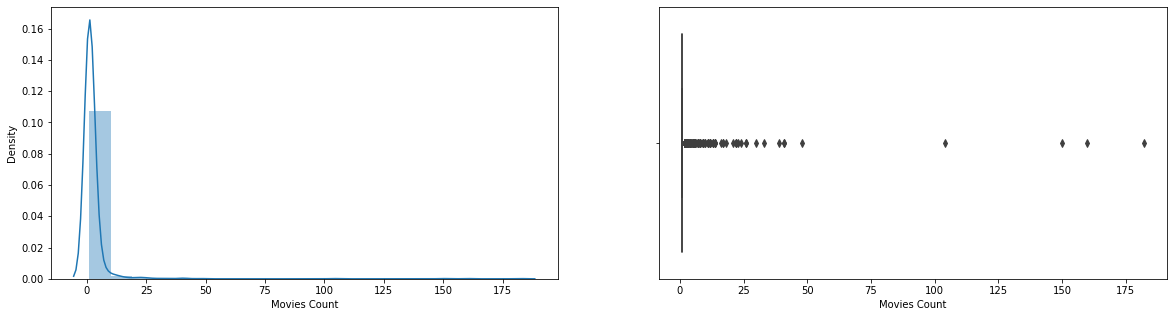

In [100]:
f, ax = plt.subplots(1, 2 , figsize = (20, 5))
sns.distplot(mixed_countries_data_movies['Movies Count'], bins = 20, kde = True, ax = ax[0])
sns.boxplot(mixed_countries_data_movies['Movies Count'], ax = ax[1])
plt.show()

In [101]:
# Creating distinct dataframes only with the movies present on individual streaming platforms
netflix_mixed_countries_movies = mixed_countries_data_movies[mixed_countries_data_movies['Netflix'] !=  0].sort_values(by = 'Netflix', ascending = False).reset_index()
netflix_mixed_countries_movies = netflix_mixed_countries_movies.drop(['index', 'Hulu', 'Prime Video', 'Disney+', 'Movies Count'], axis = 1)

hulu_mixed_countries_movies = mixed_countries_data_movies[mixed_countries_data_movies['Hulu'] !=  0].sort_values(by = 'Hulu', ascending = False).reset_index()
hulu_mixed_countries_movies = hulu_mixed_countries_movies.drop(['index', 'Netflix', 'Prime Video', 'Disney+', 'Movies Count'], axis = 1)

prime_video_mixed_countries_movies = mixed_countries_data_movies[mixed_countries_data_movies['Prime Video'] !=  0].sort_values(by = 'Prime Video', ascending = False).reset_index()
prime_video_mixed_countries_movies = prime_video_mixed_countries_movies.drop(['index', 'Netflix', 'Hulu', 'Disney+', 'Movies Count'], axis = 1)

disney_mixed_countries_movies = mixed_countries_data_movies[mixed_countries_data_movies['Disney+'] !=  0].sort_values(by = 'Disney+', ascending = False).reset_index()
disney_mixed_countries_movies = disney_mixed_countries_movies.drop(['index', 'Netflix', 'Hulu', 'Prime Video', 'Movies Count'], axis = 1)

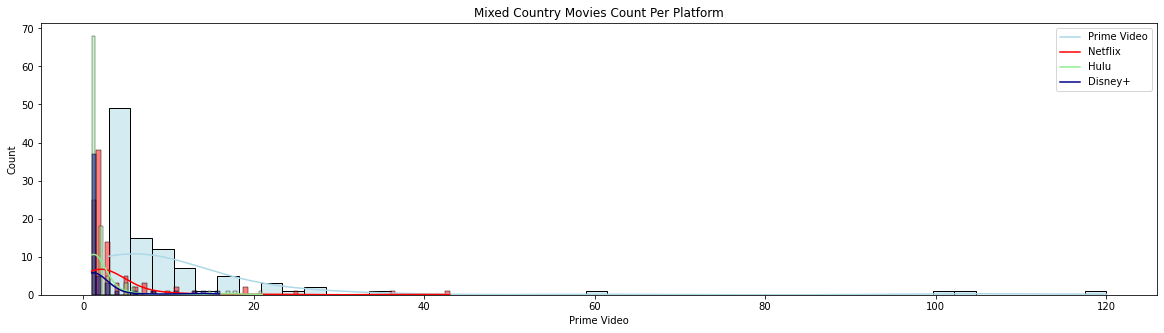

In [102]:
# Defining plot size and title
plt.figure(figsize = (20, 5))
plt.title('Mixed Country Movies Count Per Platform')
 
# Plotting the information from each dataset into a histogram
 
sns.histplot(prime_video_mixed_countries_movies['Prime Video'][:100], color = 'lightblue', legend = True, kde = True)
sns.histplot(netflix_mixed_countries_movies['Netflix'][:100], color = 'red', legend = True, kde = True)
sns.histplot(hulu_mixed_countries_movies['Hulu'][:100], color = 'lightgreen', legend = True, kde = True)
sns.histplot(disney_mixed_countries_movies['Disney+'][:100], color = 'darkblue', legend = True, kde = True)                                
 
# Setting the legend
plt.legend(['Prime Video', 'Netflix', 'Hulu', 'Disney+'])
plt.show()

In [103]:
print(f'''
      The Mixed Country with Highest Movies Count Ever Got is '{df_mixed_countries_high_movies['Mixed Country'][0]}' : '{df_mixed_countries_high_movies['Movies Count'].max()}'\n
      The Mixed Country with Lowest Movies Count Ever Got is '{df_mixed_countries_low_movies['Mixed Country'][0]}' : '{df_mixed_countries_low_movies['Movies Count'].min()}'\n
      
      The Mixed Country with Highest Movies Count on 'Netflix' is '{netflix_mixed_countries_high_movies['Mixed Country'][0]}' : '{netflix_mixed_countries_high_movies['Netflix'].max()}'\n
      The Mixed Country with Lowest Movies Count on 'Netflix' is '{netflix_mixed_countries_low_movies['Mixed Country'][0]}' : '{netflix_mixed_countries_low_movies['Netflix'].min()}'\n
      
      The Mixed Country with Highest Movies Count on 'Hulu' is '{hulu_mixed_countries_high_movies['Mixed Country'][0]}' : '{hulu_mixed_countries_high_movies['Hulu'].max()}'\n
      The Mixed Country with Lowest Movies Count on 'Hulu' is '{hulu_mixed_countries_low_movies['Mixed Country'][0]}' : '{hulu_mixed_countries_low_movies['Hulu'].min()}'\n
      
      The Mixed Country with Highest Movies Count on 'Prime Video' is '{prime_video_mixed_countries_high_movies['Mixed Country'][0]}' : '{prime_video_mixed_countries_high_movies['Prime Video'].max()}'\n
      The Mixed Country with Lowest Movies Count on 'Prime Video' is '{prime_video_mixed_countries_low_movies['Mixed Country'][0]}' : '{prime_video_mixed_countries_low_movies['Prime Video'].min()}'\n
      
      The Mixed Country with Highest Movies Count on 'Disney+' is '{disney_mixed_countries_high_movies['Mixed Country'][0]}' : '{disney_mixed_countries_high_movies['Disney+'].max()}'\n
      The Mixed Country with Lowest Movies Count on 'Disney+' is '{disney_mixed_countries_low_movies['Mixed Country'][0]}' : '{disney_mixed_countries_low_movies['Disney+'].min()}'\n 
      ''')


      The Mixed Country with Highest Movies Count Ever Got is 'United Kingdom,United States' : '182'

      The Mixed Country with Lowest Movies Count Ever Got is 'United Kingdom,Sweden,Cayman Islands' : '1'

      
      The Mixed Country with Highest Movies Count on 'Netflix' is 'United Kingdom,United States' : '43'

      The Mixed Country with Lowest Movies Count on 'Netflix' is 'Israel,Switzerland,Germany,France' : '0'

      
      The Mixed Country with Highest Movies Count on 'Hulu' is 'United States,Canada' : '21'

      The Mixed Country with Lowest Movies Count on 'Hulu' is 'Israel,Switzerland,Germany,France' : '0'

      
      The Mixed Country with Highest Movies Count on 'Prime Video' is 'United Kingdom,United States' : '120'

      The Mixed Country with Lowest Movies Count on 'Prime Video' is 'Lebanon,Qatar' : '0'

      
      The Mixed Country with Highest Movies Count on 'Disney+' is 'United States,United Kingdom' : '16'

      The Mixed Country with Lowest Movies 

In [104]:
print(f'''
      Accross All Platforms the Average Movies Count of Mixed Country is '{round(mixed_countries_data_movies['Movies Count'].mean(), ndigits = 2)}'\n
      The Average Movies Count of Mixed Country on 'Netflix' is '{round(netflix_mixed_countries_movies['Netflix'].mean(), ndigits = 2)}'\n
      The Average Movies Count of Mixed Country on 'Hulu' is '{round(hulu_mixed_countries_movies['Hulu'].mean(), ndigits = 2)}'\n
      The Average Movies Count of Mixed Country on 'Prime Video' is '{round(prime_video_mixed_countries_movies['Prime Video'].mean(), ndigits = 2)}'\n
      The Average Movies Count of Mixed Country on 'Disney+' is '{round(disney_mixed_countries_movies['Disney+'].mean(), ndigits = 2)}'\n 
      ''')


      Accross All Platforms the Average Movies Count of Mixed Country is '2.4'

      The Average Movies Count of Mixed Country on 'Netflix' is '1.77'

      The Average Movies Count of Mixed Country on 'Hulu' is '1.67'

      The Average Movies Count of Mixed Country on 'Prime Video' is '2.21'

      The Average Movies Count of Mixed Country on 'Disney+' is '2.46'
 
      


In [105]:
print(f'''
      Accross All Platforms Total Count of Mixed Country is '{mixed_countries_data_movies['Mixed Country'].unique().shape[0]}'\n
      Total Count of Mixed Country on 'Netflix' is '{netflix_mixed_countries_movies['Mixed Country'].unique().shape[0]}'\n
      Total Count of Mixed Country on 'Hulu' is '{hulu_mixed_countries_movies['Mixed Country'].unique().shape[0]}'\n
      Total Count of Mixed Country on 'Prime Video' is '{prime_video_mixed_countries_movies['Mixed Country'].unique().shape[0]}'\n
      Total Count of Mixed Country on 'Disney+' is '{disney_mixed_countries_movies['Mixed Country'].unique().shape[0]}'\n 
      ''')


      Accross All Platforms Total Count of Mixed Country is '1279'

      Total Count of Mixed Country on 'Netflix' is '399'

      Total Count of Mixed Country on 'Hulu' is '175'

      Total Count of Mixed Country on 'Prime Video' is '943'

      Total Count of Mixed Country on 'Disney+' is '52'
 
      


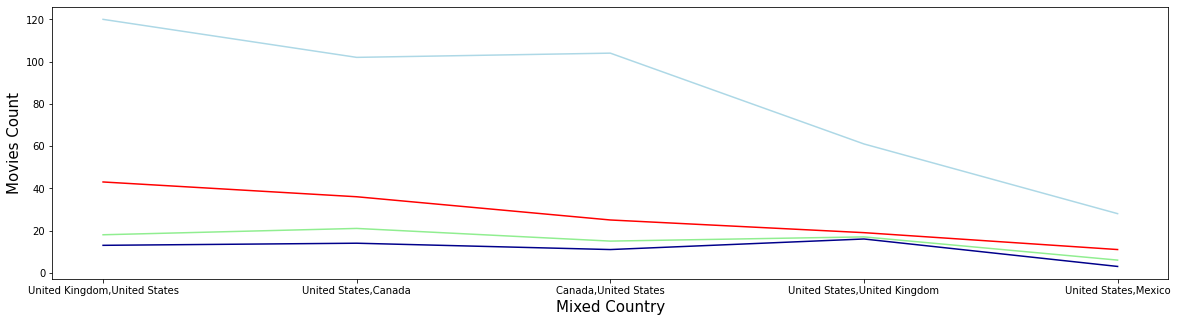

In [106]:
plt.figure(figsize = (20, 5))
sns.lineplot(x = mixed_countries_data_movies['Mixed Country'][:5], y = mixed_countries_data_movies['Netflix'][:5], color = 'red')
sns.lineplot(x = mixed_countries_data_movies['Mixed Country'][:5], y = mixed_countries_data_movies['Hulu'][:5], color = 'lightgreen')
sns.lineplot(x = mixed_countries_data_movies['Mixed Country'][:5], y = mixed_countries_data_movies['Prime Video'][:5], color = 'lightblue')
sns.lineplot(x = mixed_countries_data_movies['Mixed Country'][:5], y = mixed_countries_data_movies['Disney+'][:5], color = 'darkblue')
plt.xlabel('Mixed Country', fontsize = 15)
plt.ylabel('Movies Count', fontsize = 15)
plt.show()

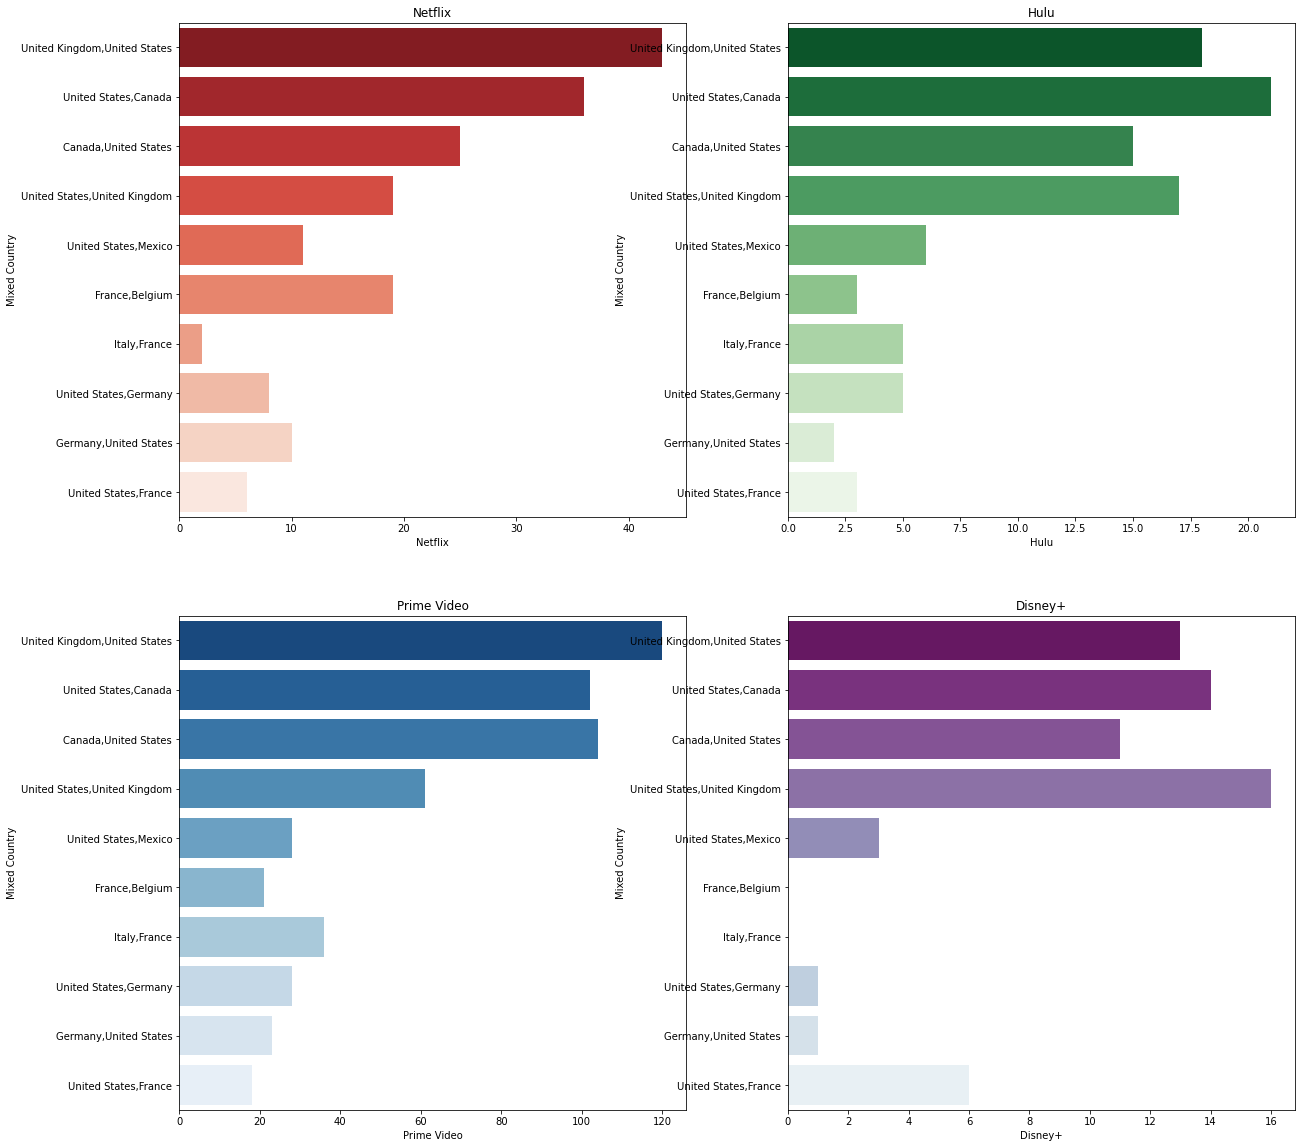

In [107]:
fig, axes = plt.subplots(2, 2, figsize = (20 , 20))
 
n_co_ax1 = sns.barplot(y = mixed_countries_data_movies['Mixed Country'][:10], x = mixed_countries_data_movies['Netflix'][:10], palette = 'Reds_r', ax = axes[0, 0])
h_co_ax2 = sns.barplot(y = mixed_countries_data_movies['Mixed Country'][:10], x = mixed_countries_data_movies['Hulu'][:10], palette = 'Greens_r', ax = axes[0, 1])
p_co_ax3 = sns.barplot(y = mixed_countries_data_movies['Mixed Country'][:10], x = mixed_countries_data_movies['Prime Video'][:10], palette = 'Blues_r', ax = axes[1, 0])
d_co_ax4 = sns.barplot(y = mixed_countries_data_movies['Mixed Country'][:10], x = mixed_countries_data_movies['Disney+'][:10], palette = 'BuPu_r', ax = axes[1, 1])
 
labels = ['Netflix', 'Hulu', 'Prime Video', 'Disney+']
 
n_co_ax1.title.set_text(labels[0])
h_co_ax2.title.set_text(labels[1])
p_co_ax3.title.set_text(labels[2])
d_co_ax4.title.set_text(labels[3])
 
plt.show()

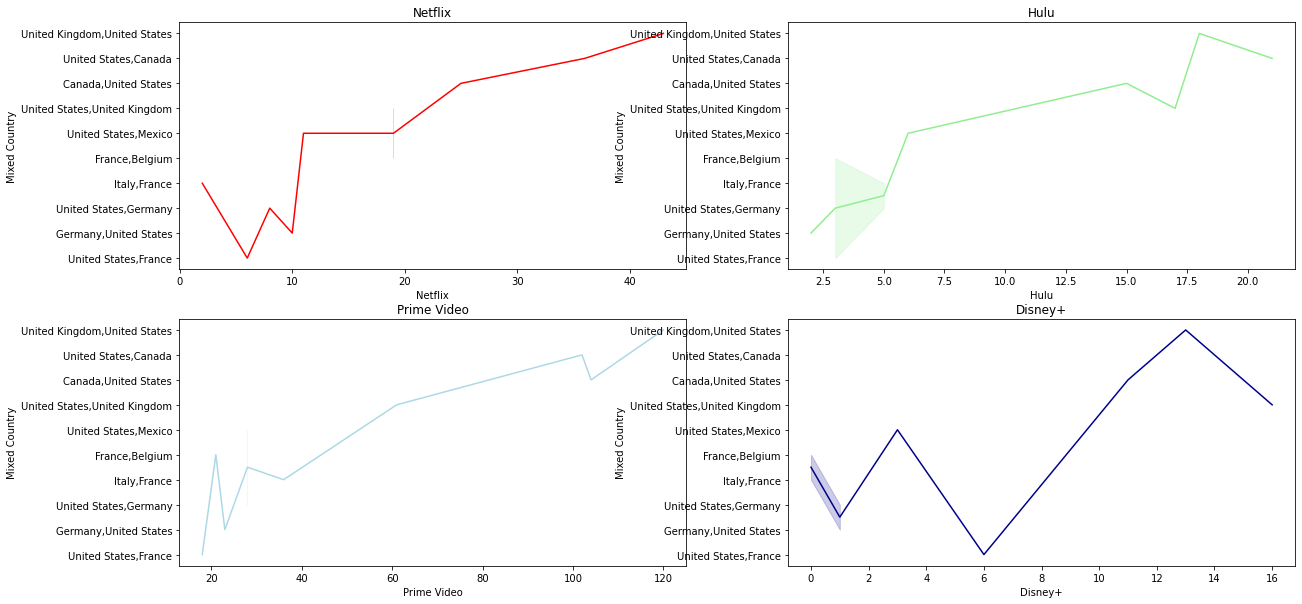

In [108]:
fig, axes = plt.subplots(2, 2, figsize = (20 , 10))
 
n_mco_ax1 = sns.lineplot(y = mixed_countries_data_movies['Mixed Country'][:10], x = mixed_countries_data_movies['Netflix'][:10], color = 'red', ax = axes[0, 0])
h_mco_ax2 = sns.lineplot(y = mixed_countries_data_movies['Mixed Country'][:10], x = mixed_countries_data_movies['Hulu'][:10], color = 'lightgreen', ax = axes[0, 1])
p_mco_ax3 = sns.lineplot(y = mixed_countries_data_movies['Mixed Country'][:10], x = mixed_countries_data_movies['Prime Video'][:10], color = 'lightblue', ax = axes[1, 0])
d_mco_ax4 = sns.lineplot(y = mixed_countries_data_movies['Mixed Country'][:10], x = mixed_countries_data_movies['Disney+'][:10], color = 'darkblue', ax = axes[1, 1])
 
labels = ['Netflix', 'Hulu', 'Prime Video', 'Disney+']
 
n_mco_ax1.title.set_text(labels[0])
h_mco_ax2.title.set_text(labels[1])
p_mco_ax3.title.set_text(labels[2])
d_mco_ax4.title.set_text(labels[3])
 
plt.show()

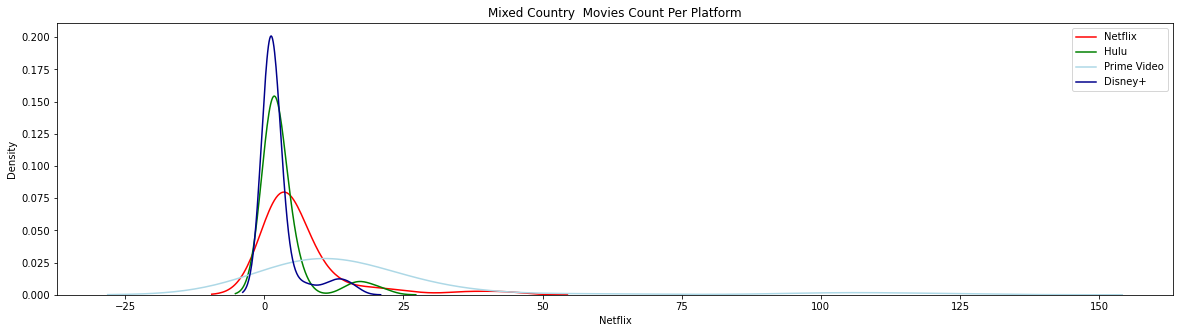

In [109]:
# Defining plot size and title
plt.figure(figsize = (20, 5))
plt.title('Mixed Country  Movies Count Per Platform')
 
# Plotting the information from each dataset into a histogram
sns.kdeplot(netflix_mixed_countries_movies['Netflix'][:50], color = 'red', legend = True)
sns.kdeplot(hulu_mixed_countries_movies['Hulu'][:50], color = 'green', legend = True)
sns.kdeplot(prime_video_mixed_countries_movies['Prime Video'][:50], color = 'lightblue', legend = True)
sns.kdeplot(disney_mixed_countries_movies['Disney+'][:50], color = 'darkblue', legend = True)                                      

# Setting the legend
plt.legend(['Netflix', 'Hulu', 'Prime Video', 'Disney+'])
plt.show()

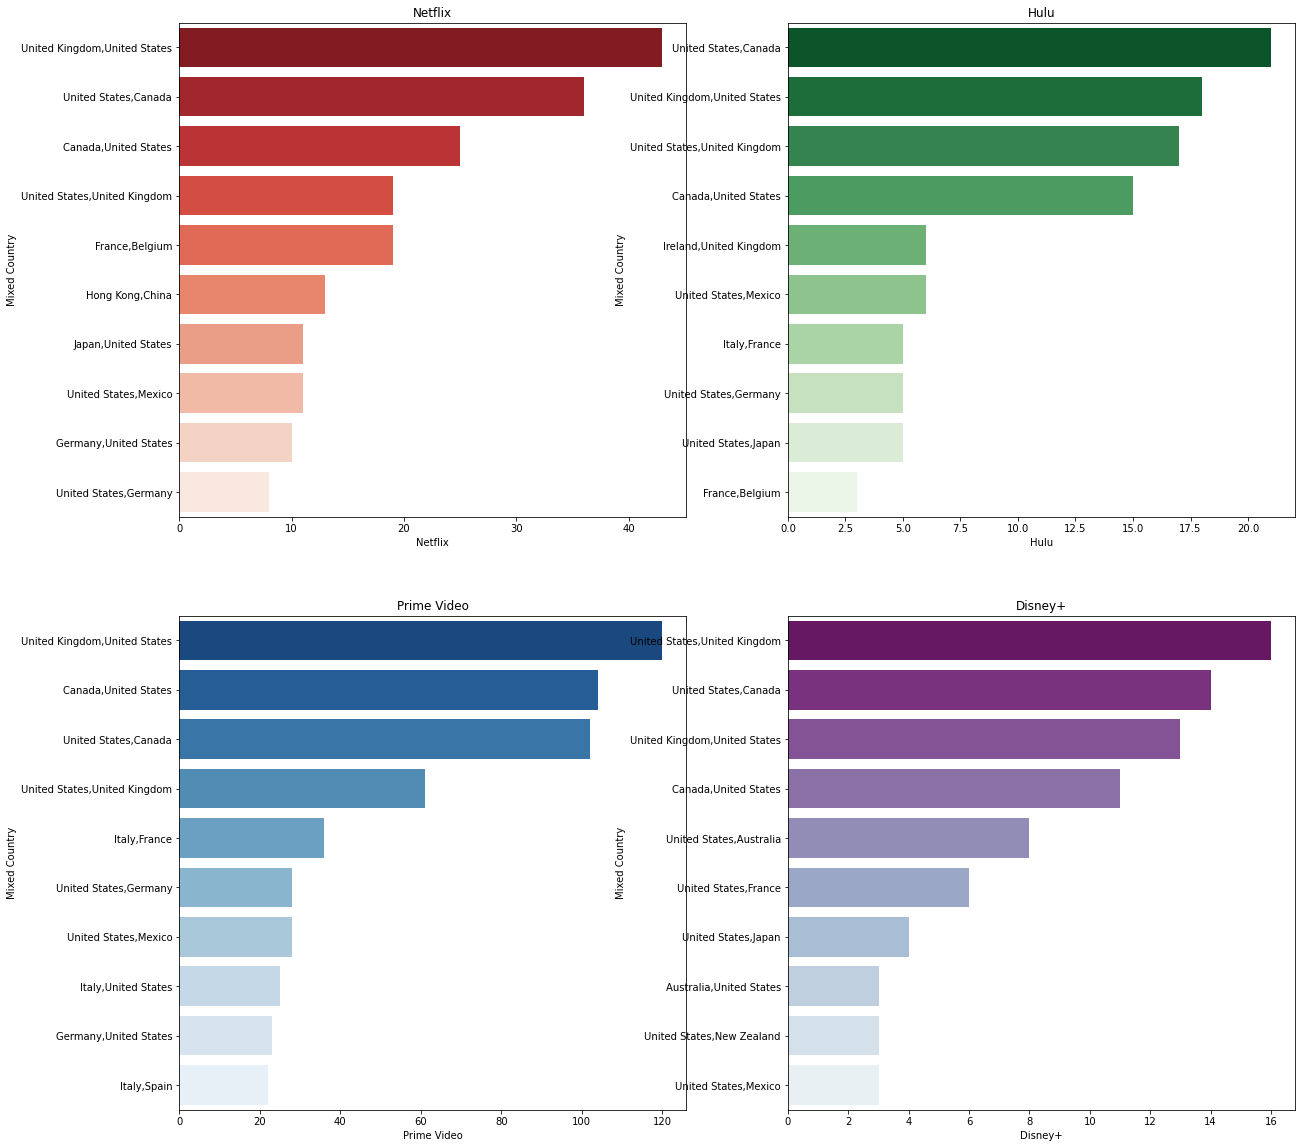

In [110]:
fig, axes = plt.subplots(2, 2, figsize = (20 , 20))
 
n_mco_ax1 = sns.barplot(y = netflix_mixed_countries_movies['Mixed Country'][:10], x = netflix_mixed_countries_movies['Netflix'][:10], palette = 'Reds_r', ax = axes[0, 0])
h_mco_ax2 = sns.barplot(y = hulu_mixed_countries_movies['Mixed Country'][:10], x = hulu_mixed_countries_movies['Hulu'][:10], palette = 'Greens_r', ax = axes[0, 1])
p_mco_ax3 = sns.barplot(y = prime_video_mixed_countries_movies['Mixed Country'][:10], x = prime_video_mixed_countries_movies['Prime Video'][:10], palette = 'Blues_r', ax = axes[1, 0])
d_mco_ax4 = sns.barplot(y = disney_mixed_countries_movies['Mixed Country'][:10], x = disney_mixed_countries_movies['Disney+'][:10], palette = 'BuPu_r', ax = axes[1, 1])
 
labels = ['Netflix', 'Hulu', 'Prime Video', 'Disney+']
 
n_mco_ax1.title.set_text(labels[0])
h_mco_ax2.title.set_text(labels[1])
p_mco_ax3.title.set_text(labels[2])
d_mco_ax4.title.set_text(labels[3])
 
plt.show()

In [111]:
fig = go.Figure(go.Funnel(y = mixed_countries_data_movies['Mixed Country'][:10], x = mixed_countries_data_movies['Movies Count'][:10]))
fig.show()